# Exploratory data analysis of healthcare dataset
# Demographic and Healthcare Analysis
## Data Loading
We will use census_2011.csv with:
- hospitals.csv
- government_hospitals.csv
- Employees State Insurance Corporation.csv

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import zscore

In [2]:
df=pd.read_csv("census_2011.csv")
df1 = pd.read_csv('hospitals.csv')
df2 = pd.read_csv('government_hospitals.csv', skiprows=1)
df3 = pd.read_csv('Employees State Insurance Corporation.csv',header=1,index_col=0)

In [3]:
df.head(10)  # census csv first 10 values 

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0
5,6,JAMMU AND KASHMIR,Rajouri,642415.0,345351.0,297064.0,364109.0,224469.0,139640.0,48157.0,...,NaN,443.0,42.0,NaN,100.0,72.0,22.0,94.0,15.0,786.0
6,7,JAMMU AND KASHMIR,Kathua,616435.0,326109.0,290326.0,389204.0,228499.0,160705.0,141224.0,...,174.0,514.0,54.0,69.0,123.0,78.0,52.0,130.0,28.0,936.0
7,8,JAMMU AND KASHMIR,Baramula,1008039.0,534733.0,473306.0,NaN,337170.0,207979.0,1476.0,...,254.0,1049.0,155.0,190.0,345.0,NaN,78.0,255.0,64.0,2100.0
8,9,JAMMU AND KASHMIR,Bandipore,392232.0,207680.0,184552.0,185979.0,117058.0,68921.0,392.0,...,11.0,NaN,2.0,2.0,4.0,3.0,3.0,6.0,0.0,45.0
9,10,JAMMU AND KASHMIR,Srinagar,1236829.0,651124.0,585705.0,748584.0,431746.0,316838.0,1068.0,...,668.0,1095.0,319.0,380.0,699.0,240.0,370.0,610.0,445.0,3099.0


In [4]:
df.columns # ccolumns of census csv

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [5]:
df.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.100000e+02,6.100000e+02,6.070000e+02,6.040000e+02,6.090000e+02,6.130000e+02,6.050000e+02,6.170000e+02,6.080000e+02,...,607.000000,610.000000,611.000000,605.000000,616.000000,607.000000,610.000000,617.000000,610.000000,608.000000
mean,320.500000,1.852620e+06,9.685726e+05,9.139882e+05,1.190550e+06,6.739088e+05,5.129481e+05,3.177854e+05,1.624509e+05,1.544700e+05,...,792.028007,1676.009836,288.960720,213.919008,513.099026,197.375618,264.191803,463.019449,283.934426,3334.167763
std,184.896367,1.435578e+06,7.926455e+05,7.479293e+05,1.050630e+06,5.683384e+05,4.801441e+05,3.172010e+05,1.625607e+05,1.537418e+05,...,1059.010710,1669.641260,641.765892,370.466703,985.702797,433.595214,599.182627,1023.577867,1073.822380,4683.995495
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,160.750000,8.148625e+05,4.180382e+05,3.986990e+05,4.796545e+05,2.695820e+05,2.009450e+05,8.799100e+04,4.251300e+04,4.411825e+04,...,236.000000,588.000000,59.000000,23.000000,93.500000,19.000000,21.000000,44.000000,18.000000,1053.500000
50%,320.500000,1.557367e+06,7.939620e+05,7.556020e+05,9.793575e+05,5.507160e+05,4.048610e+05,2.463370e+05,1.252140e+05,1.181440e+05,...,507.000000,1196.000000,144.000000,107.000000,274.000000,84.000000,84.000000,188.000000,61.500000,2291.500000
75%,480.250000,2.565248e+06,1.318615e+06,1.253832e+06,1.602260e+06,9.203140e+05,6.568420e+05,4.550620e+05,2.284310e+05,2.163095e+05,...,939.000000,2224.250000,293.000000,253.000000,562.250000,216.000000,293.000000,509.000000,212.750000,3985.250000
max,640.000000,1.000978e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13483.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


## Basic thing in data analysis
1. handling missing value
2. explore about categorical and numeric variable
3. finding realationship b/w features
4. handling outliers

# handling missing values 
1. handling missing values of census_2011.csv

In [6]:
# checkinh how much mull values are there in each column
df.isnull().sum()


District code                     0
State name                        0
District name                     0
Population                       30
Male                             30
                                 ..
Power_Parity_Rs_330000_425000    33
Power_Parity_Rs_425000_545000    30
Power_Parity_Rs_330000_545000    23
Power_Parity_Above_Rs_545000     30
Total_Power_Parity               32
Length: 118, dtype: int64

### If we want only column name who have missing value and their values

In [7]:

missing_cols = [missing for missing in df.columns if df[missing].isnull().sum() > 0]
missing_info = {col: df[col].isnull().sum() for col in missing_cols}
i=1
for col, num_missing in missing_info.items():
    print(i,":"+col ,":",num_missing)
    i=i+1
    

1 :Population : 30
2 :Male : 30
3 :Female : 33
4 :Literate : 36
5 :Male_Literate : 31
6 :Female_Literate : 27
7 :SC : 35
8 :Male_SC : 23
9 :Female_SC : 32
10 :ST : 29
11 :Male_ST : 31
12 :Female_ST : 31
13 :Workers : 23
14 :Male_Workers : 22
15 :Female_Workers : 19
16 :Main_Workers : 28
17 :Marginal_Workers : 39
18 :Non_Workers : 36
19 :Cultivator_Workers : 29
20 :Agricultural_Workers : 27
21 :Household_Workers : 28
22 :Other_Workers : 28
23 :Hindus : 27
24 :Muslims : 37
25 :Christians : 30
26 :Sikhs : 29
27 :Buddhists : 26
28 :Jains : 42
29 :Others_Religions : 30
30 :Religion_Not_Stated : 35
31 :LPG_or_PNG_Households : 37
32 :Housholds_with_Electric_Lighting : 41
33 :Households_with_Internet : 23
34 :Households_with_Computer : 27
35 :Rural_Households : 42
36 :Urban_Households : 33
37 :Households : 32
38 :Below_Primary_Education : 34
39 :Primary_Education : 41
40 :Middle_Education : 38
41 :Secondary_Education : 37
42 :Higher_Education : 21
43 :Graduate_Education : 30
44 :Other_Educatio

# Heat map for checking null values


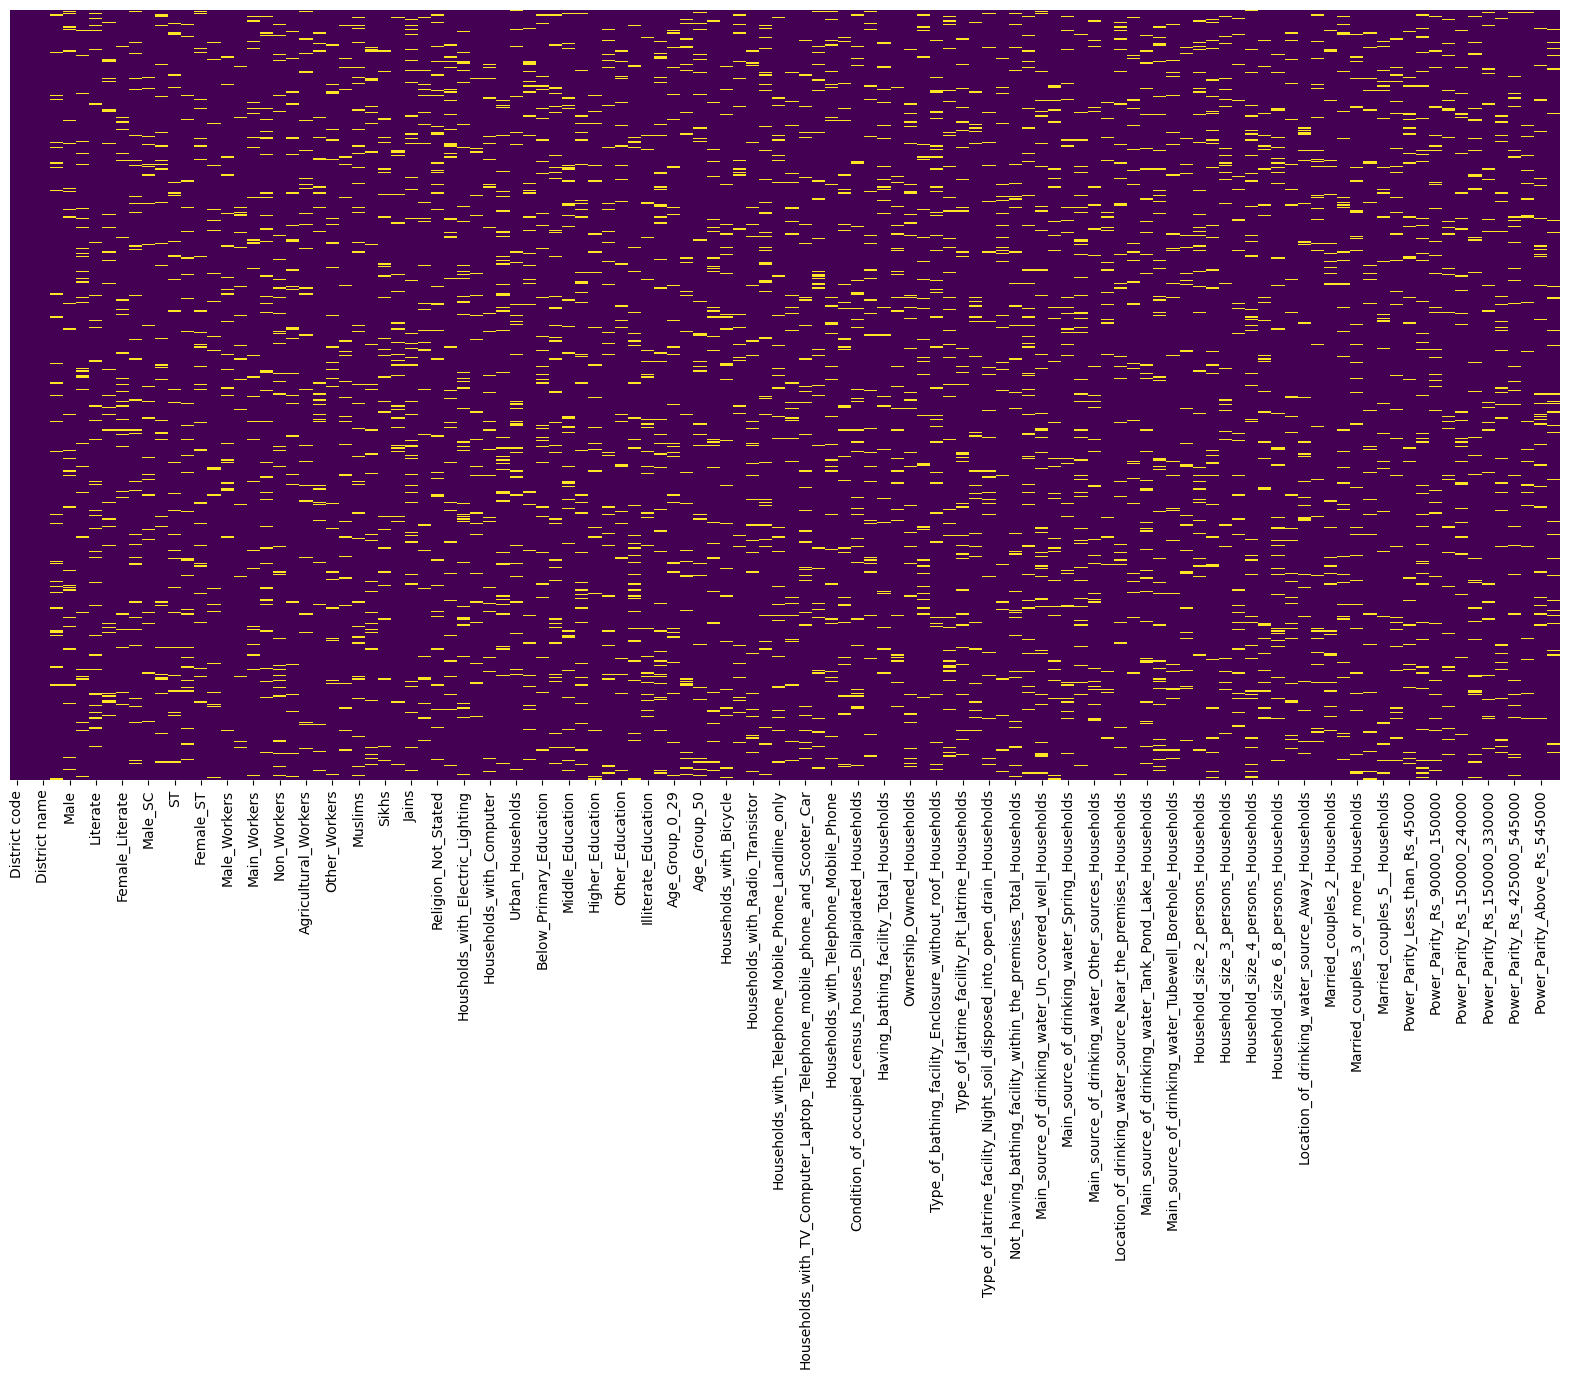

In [8]:
cols_to_visualize = df.columns  # Adjust this as needed
plt.figure(figsize=(20, 10))  # Adjust figure size
sns.heatmap(df[cols_to_visualize].isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

**Analysis:-** here these yellow spots depicts us the null value and after clearing null value the ideal graph will look only purple

# removing null value and recheking it by graphs

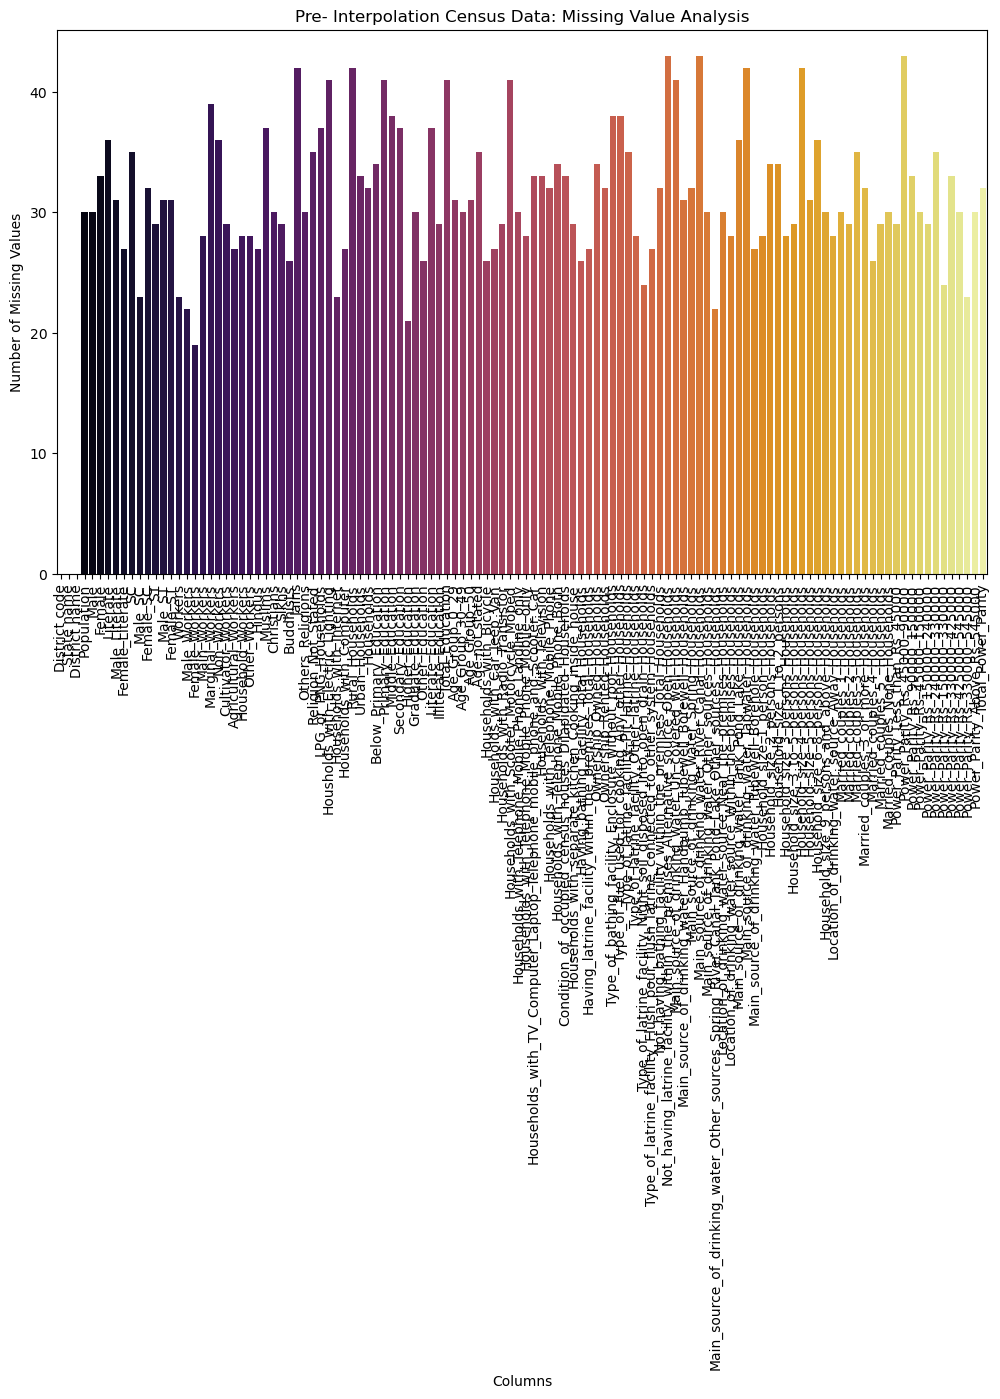

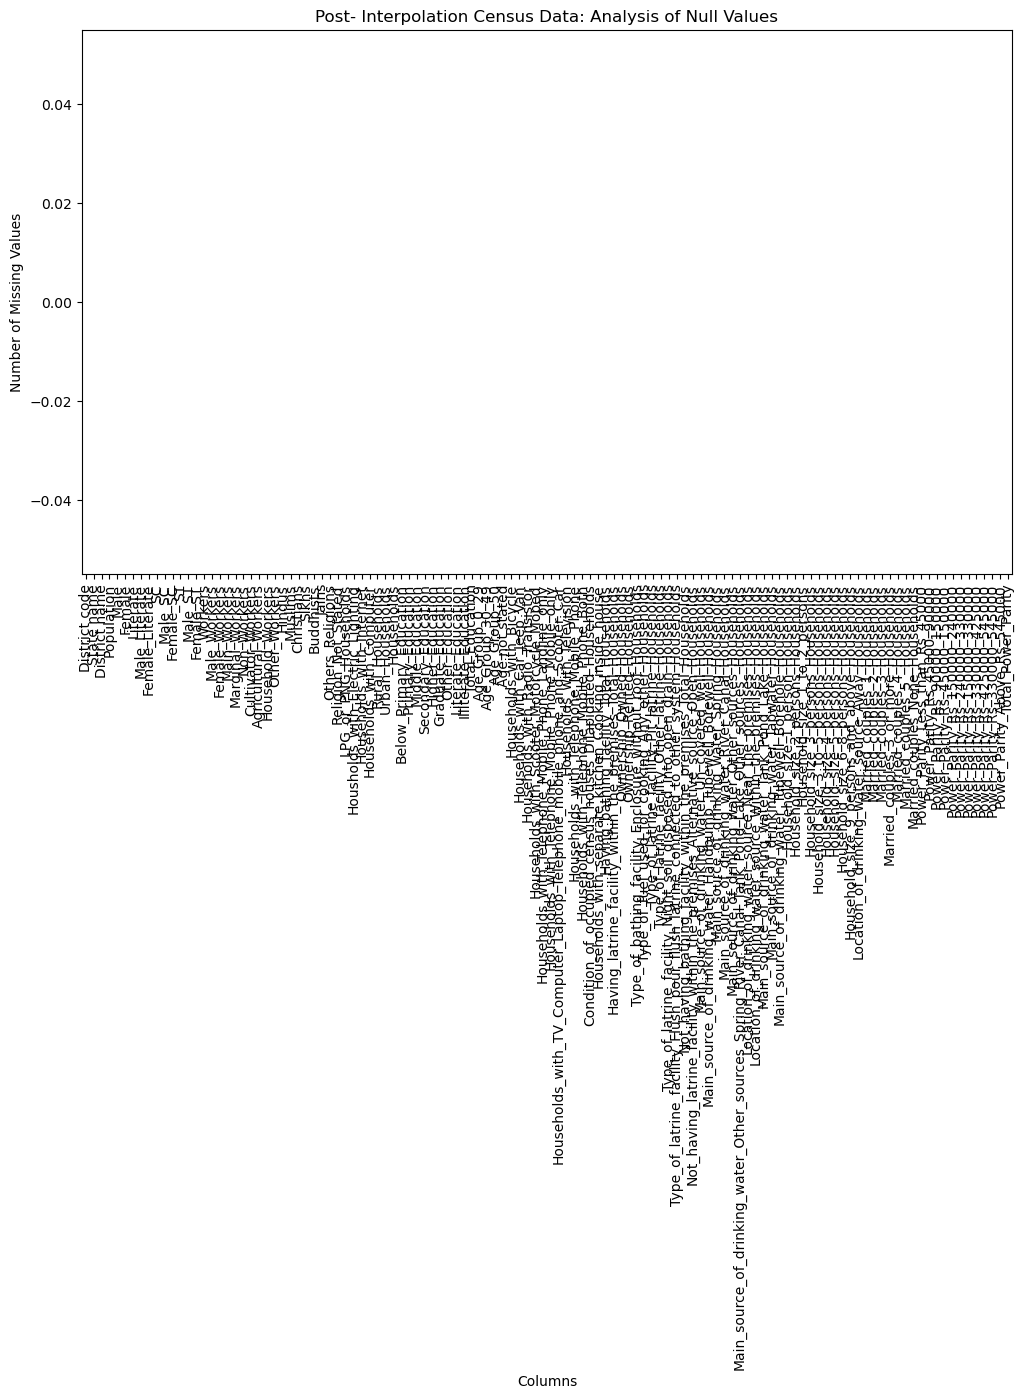

In [9]:
def plot_missing_values(df4, title, before_imputation=True):
    missing_values = df4.isnull().sum()
    palette = 'inferno' if before_imputation else 'Greens'
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette=palette)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin if needed
    
    plt.show()
# Plot before interpolation

plot_missing_values(df, "Pre- Interpolation Census Data: Missing Value Analysis", before_imputation=True)

# Perform interpolation  (assuming filling with mean for numerical columns)

numeric_columns = df.select_dtypes(include=np.number).columns
# Forward fill numeric columns first
df[numeric_columns] = df[numeric_columns].ffill()

# Then backward fill to handle remaining Nonee values
df[numeric_columns] = df[numeric_columns].bfill()

# Plot after imputation
plot_missing_values(df, "Post- Interpolation Census Data: Analysis of Null Values", before_imputation=False)

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

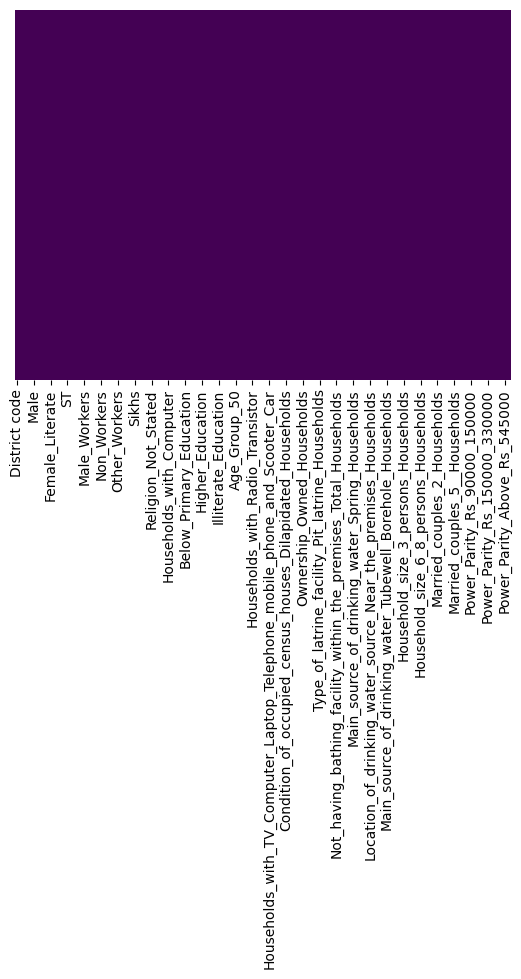

In [10]:
# checking by heatmap 
sns.heatmap(df[cols_to_visualize].isnull(), yticklabels=False, cbar=False, cmap="viridis")
df.isnull().sum()

**Analysis:-** this is the heat map which look ideally purple with No None value

### Working on other csv file which we will use further to find relationships 

In [11]:
df1.head()


,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [12]:
df2.head()


,Unnamed: 0,No.,Beds,No..1,Beds.1,Unnamed: 5
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


In [13]:
df3.head()

,States /UTs,Total No. of Hospital,Total No. of Beds
S. No.,,,
1,Andhra Pradesh,5.0,345.0
2,Assam,1.0,75.0
3,Bihar,3.0,50.0
4,Chandigarh [Adm.],1.0,70.0
5,Chhattisgarh,0.0,0.0


In [14]:
df1.describe()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
count,37,37,37,30,37,37,37
unique,37,35,30,24,25,37,37
top,Andaman & Nicobar Islands,40,2,1,15,34,1246
freq,1,2,4,4,3,1,1


In [15]:
df2.describe()

,No.,Beds,No..1,Beds.1
count,37.000000,37.000000,37.000000,37.000000
mean,1070.810811,15112.864865,203.891892,23306.648649
std,3278.430865,45752.664986,616.352568,70502.578529
min,0.000000,0.000000,0.000000,0.000000
25%,24.000000,630.000000,14.000000,1393.000000
50%,273.000000,5805.000000,59.000000,5228.000000
75%,705.000000,10944.000000,149.000000,18819.000000
max,19810.000000,279588.000000,3772.000000,431173.000000


In [16]:
df3.describe()

,Total No. of Hospital,Total No. of Beds
count,30.000000,30.000000
mean,10.066667,1317.666667
std,27.064334,3589.889100
min,0.000000,0.000000
25%,1.000000,50.000000
50%,4.500000,335.000000
75%,9.500000,1111.000000
max,151.000000,19765.000000


In [17]:
df1.isnull().sum()

Unnamed: 0      0
PHC             0
CHC             0
SDH             7
DH              0
Hospitals       0
HospitalBeds    0
dtype: int64

# handling null values of df1 :_ hospital

In [18]:
df1[['PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds']] = df1[['PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds']].apply(pd.to_numeric, errors='coerce')
def heatmaps(df1,title,before_imputation=True):
    sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap="viridis")
    plt.title(title)
    plt.show

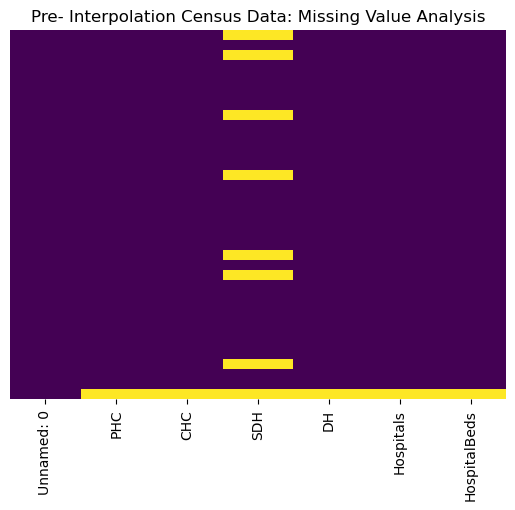

In [19]:
heatmaps(df1,"Pre- Interpolation Census Data: Missing Value Analysis",before_imputation=True)
numeric_columns = df1.select_dtypes(include=np.number).columns
# Forward fill numeric columns first
df1[numeric_columns] = df1[numeric_columns].ffill()
# Then backward fill to handle remaining NaN values
df1[numeric_columns] = df1[numeric_columns].bfill()


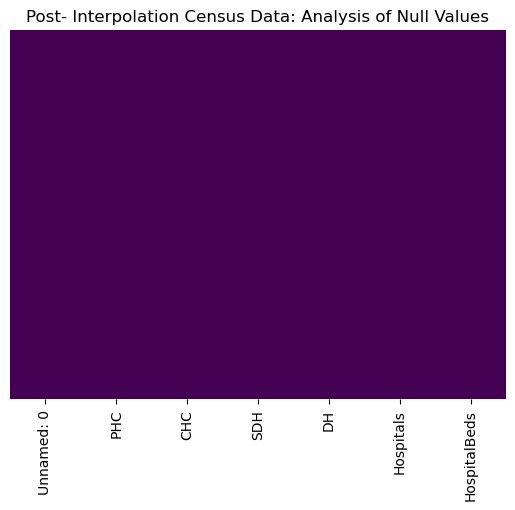

In [20]:
heatmaps(df1, "Post- Interpolation Census Data: Analysis of Null Values",before_imputation=False)


# handing outliers of census_2011.csv
### as there are many columns in census csv we will just remove outliers of column which we can use in making relationships
- for proper relationship the outliers of each file should be removed

In [21]:
def outliers_zscore_quantile(df, columns, threshold=3):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        # Calculate Z-scores for the column
        col_zscore = zscore(df[col].dropna())
        # Get the index of rows without outliers
        valid_indices = df[col].dropna().index[abs(col_zscore) < threshold]
        # Filter the dataframe
        df = df.loc[valid_indices]
    return df

# Handling outlier related to households

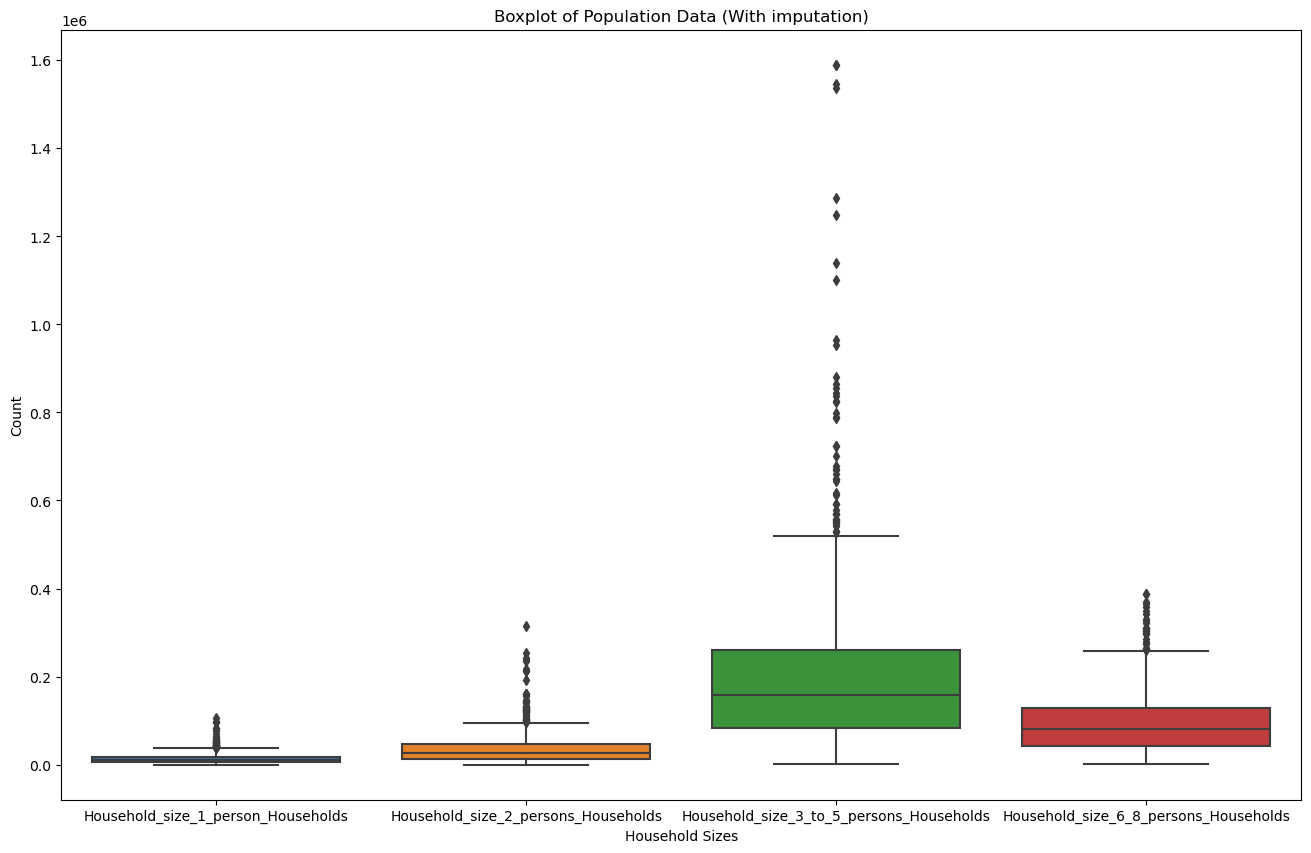

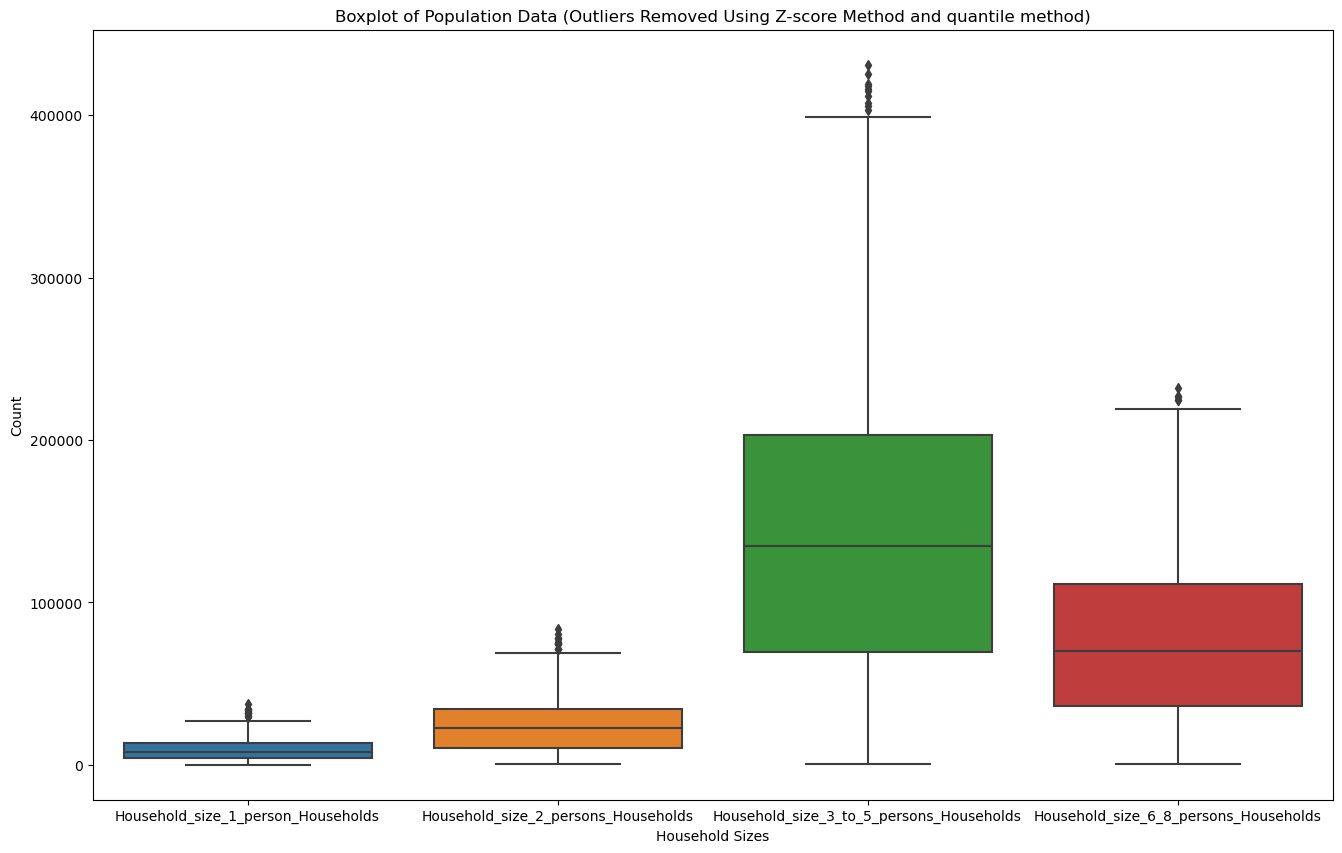

In [22]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households', 'Household_size_6_8_persons_Households']])
plt.title('Boxplot of Population Data (With imputation)')
plt.xlabel('Household Sizes')
plt.ylabel('Count')
plt.show()
df_cleaned = outliers_zscore_quantile(df, ['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households','Household_size_6_8_persons_Households'])

plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned[['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households','Household_size_6_8_persons_Households']])
plt.title('Boxplot of Population Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('Household Sizes')
plt.ylabel('Count')
plt.show()


# Handling outlier related to education

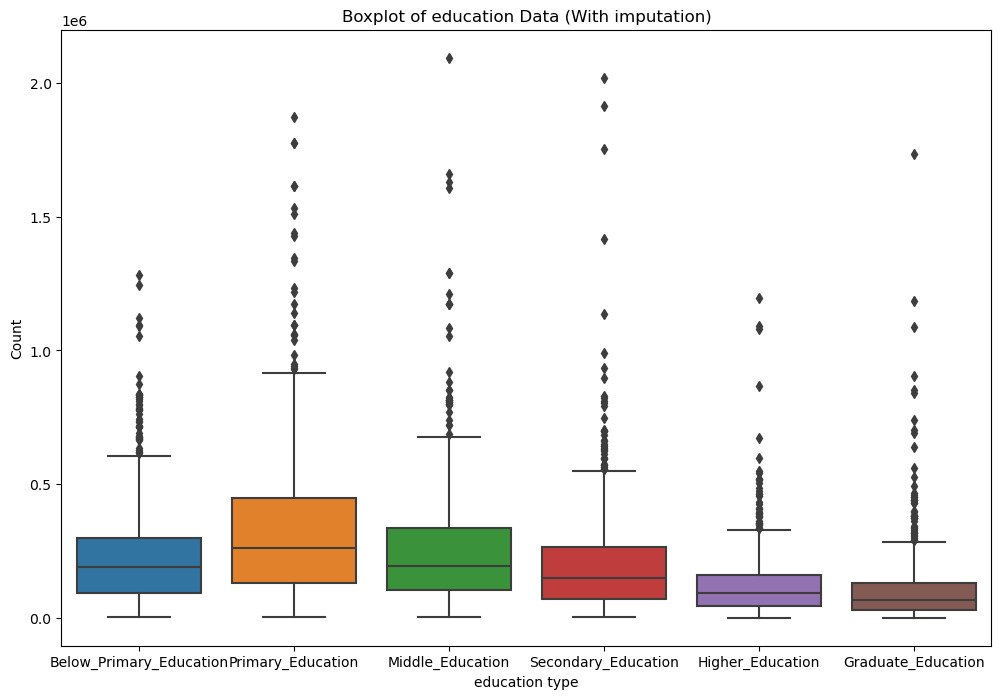

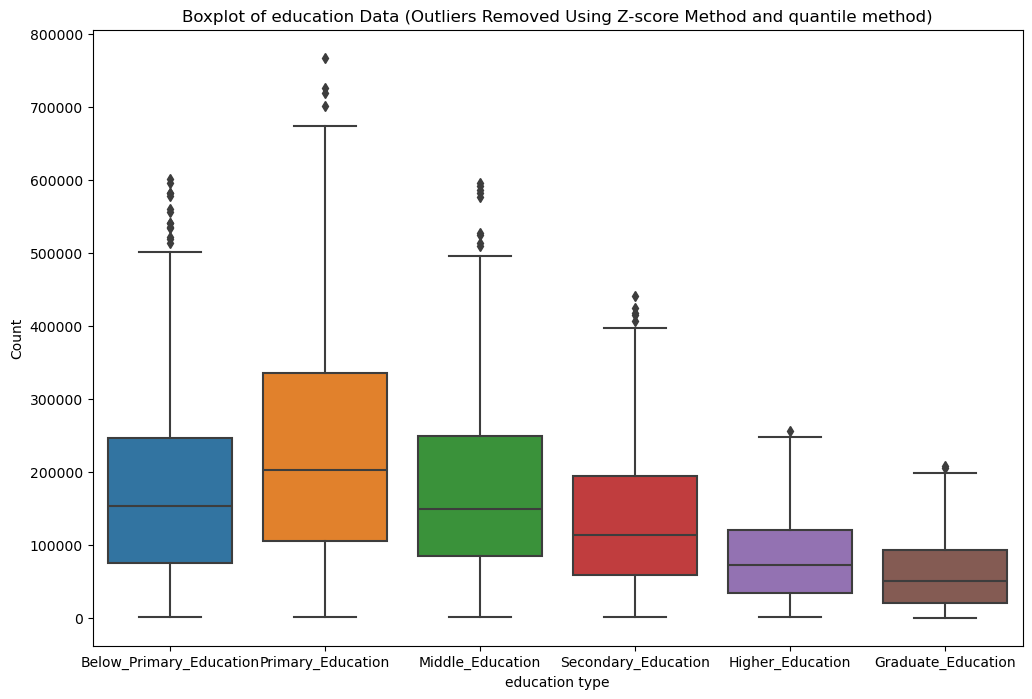

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education']])
plt.title('Boxplot of education Data (With imputation)')
plt.xlabel('education type')
plt.ylabel('Count')
plt.show()
df_cleaned1 = outliers_zscore_quantile(df,['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df_cleaned1[['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('education type')
plt.ylabel('Count')
plt.show()


## handling outliers of others dataset before determining relationships

### hospital.csv 

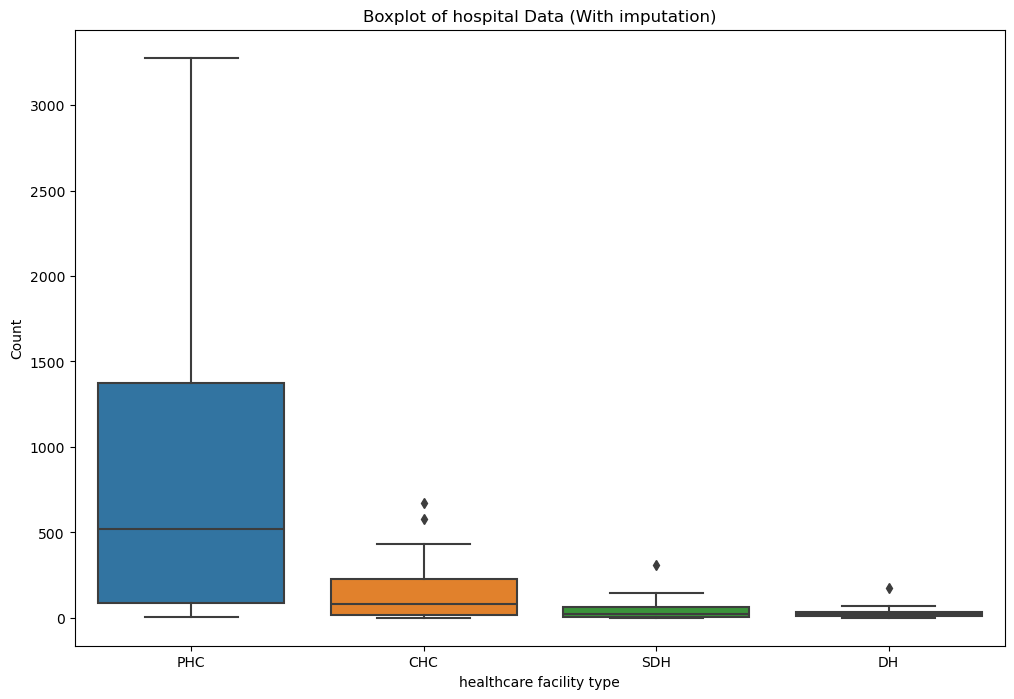

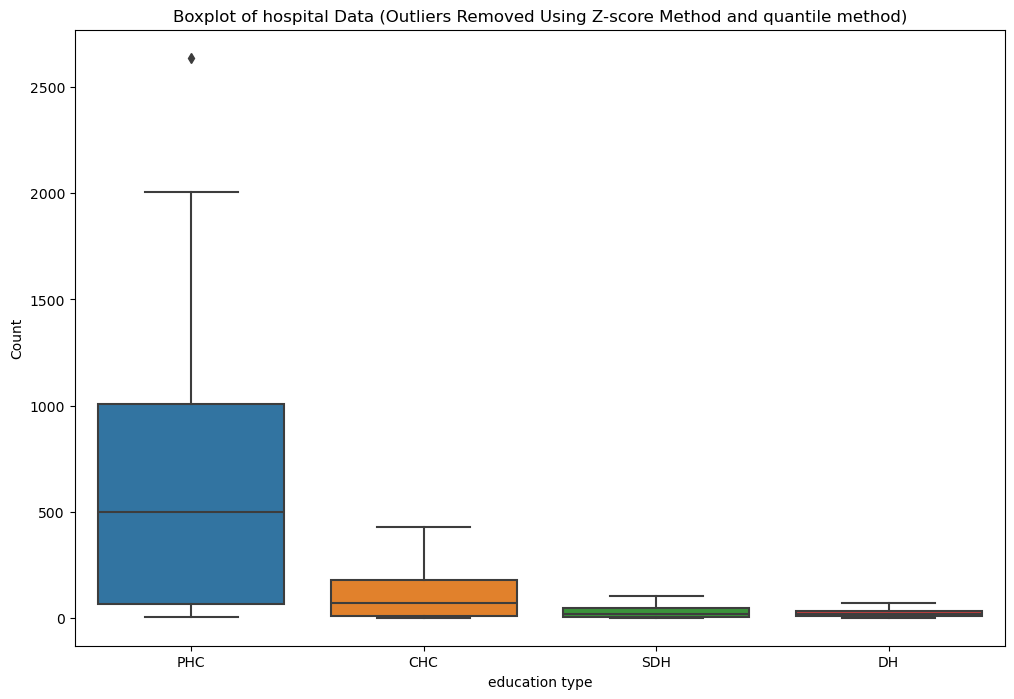

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1[['PHC', 'CHC', 'SDH', 'DH']])
plt.title('Boxplot of hospital Data (With imputation)')
plt.xlabel('healthcare facility type')
plt.ylabel('Count')
plt.show()
df1_cleaned = outliers_zscore_quantile(df1,['PHC', 'CHC', 'SDH', 'DH'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df1_cleaned[['PHC', 'CHC', 'SDH', 'DH']])
plt.title('Boxplot of hospital Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('education type')
plt.ylabel('Count')
plt.show()
df1_cleaned.rename(columns={'Unnamed: 0': 'State name'}, inplace=True)
df1.rename(columns={'Unnamed: 0': 'State name'}, inplace=True)



### State Insurance Corporation.csv

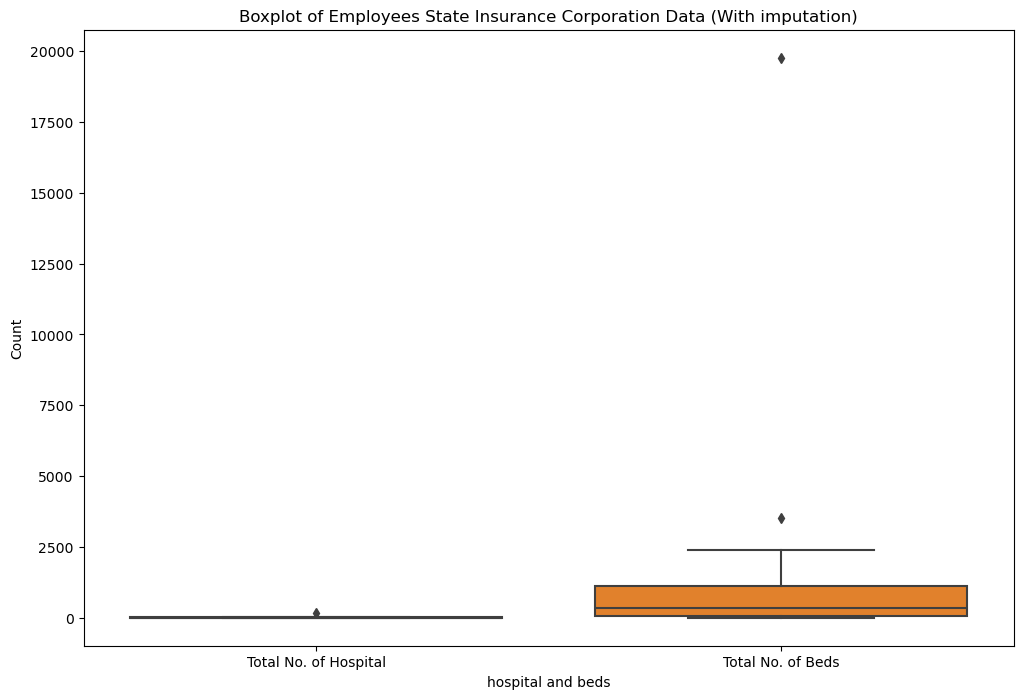

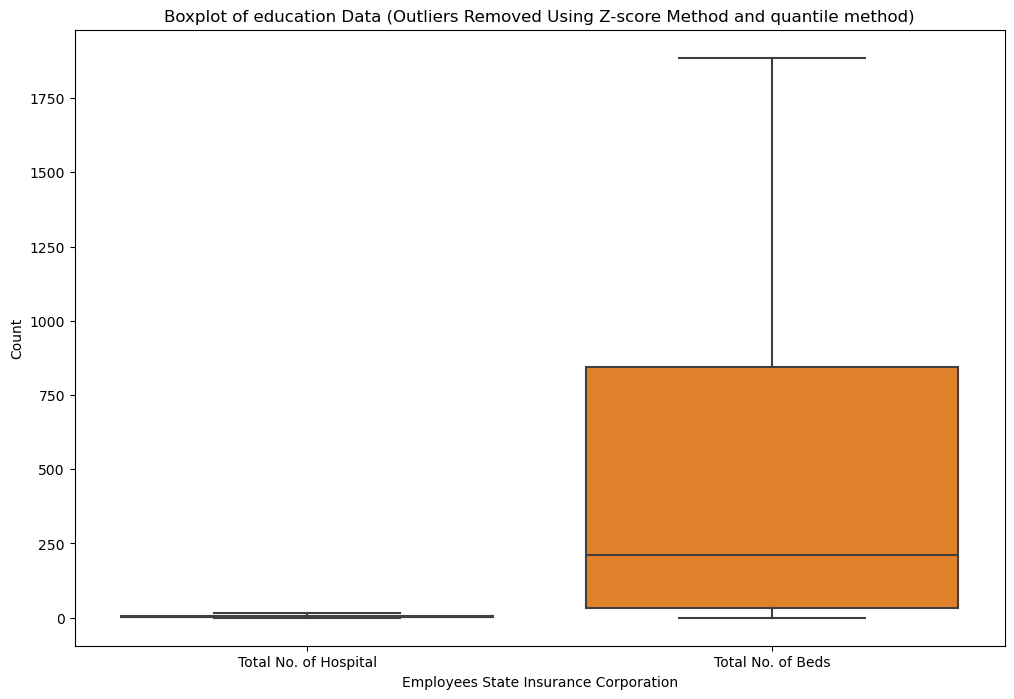

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3[['Total No. of Hospital', 'Total No. of Beds']])
plt.title('Boxplot of Employees State Insurance Corporation Data (With imputation)')
plt.xlabel('hospital and beds')
plt.ylabel('Count')
plt.show()
df3_cleaned = outliers_zscore_quantile(df3,['Total No. of Hospital', 'Total No. of Beds'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df3_cleaned[['Total No. of Hospital', 'Total No. of Beds']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('Employees State Insurance Corporation')
plt.ylabel('Count')
plt.show()


### handling outliers of .government_hospitals.csv

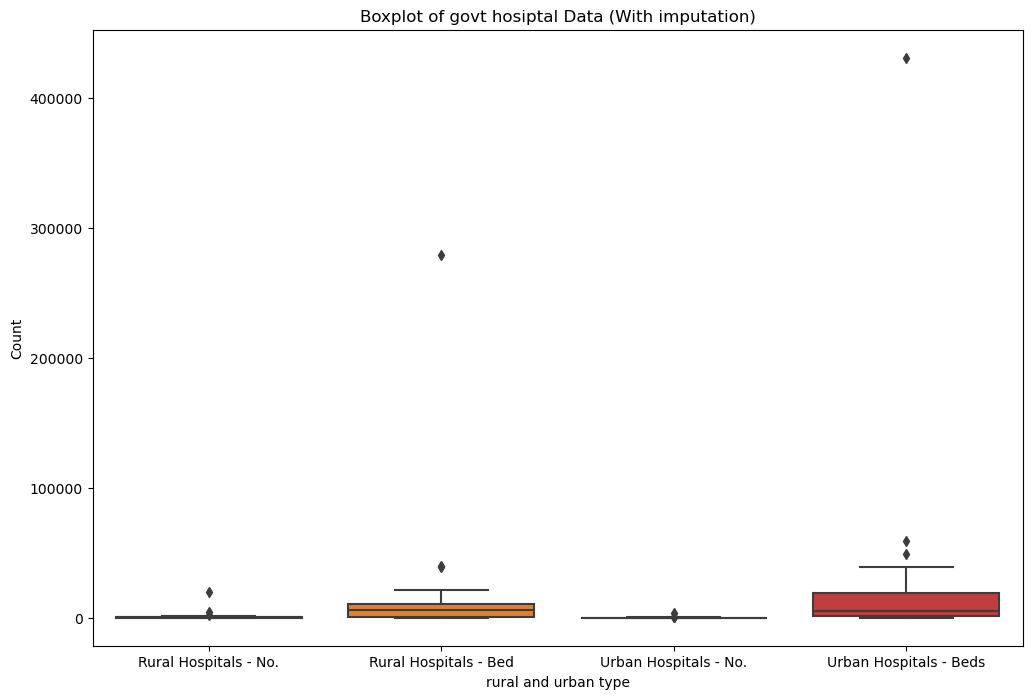

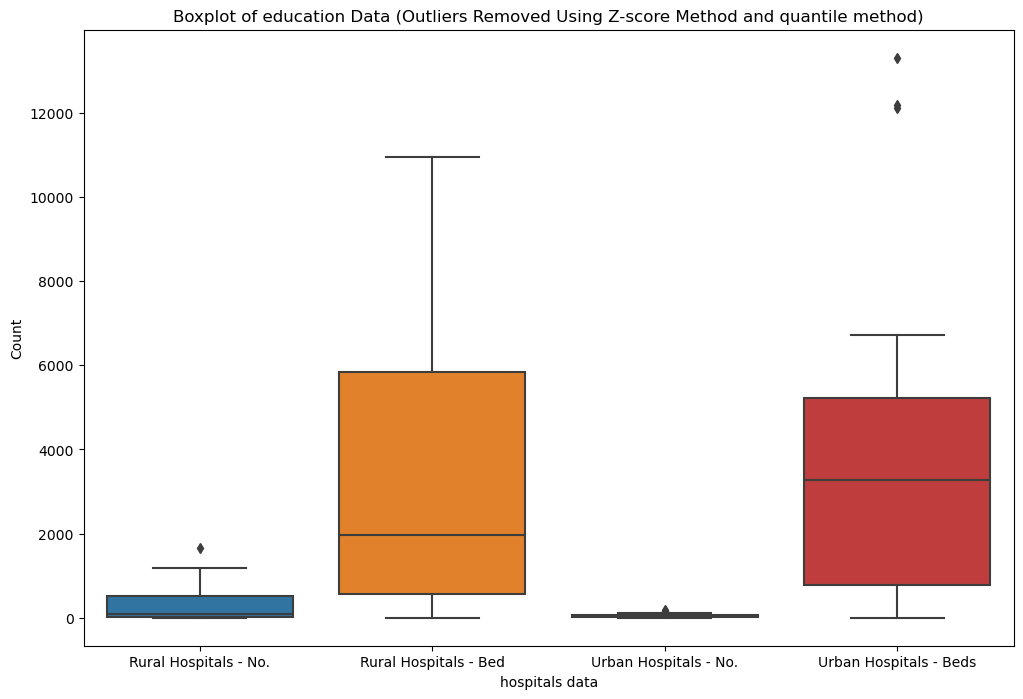

In [26]:
new_column_names = ['States/UTs', 'Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds', 'As on']
df2.columns = new_column_names
plt.figure(figsize=(12,8))
sns.boxplot(data=df2[['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds']])
plt.title('Boxplot of govt hosiptal Data (With imputation)')
plt.xlabel('rural and urban type')
plt.ylabel('Count')
plt.show()
df2_cleaned = outliers_zscore_quantile(df2,['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df2_cleaned[['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('hospitals data')
plt.ylabel('Count')
plt.show()



## Understanding Data Through Analysis and Visual Insights (EDA)
- Analysising population of male and female 

### Distribution of gender

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


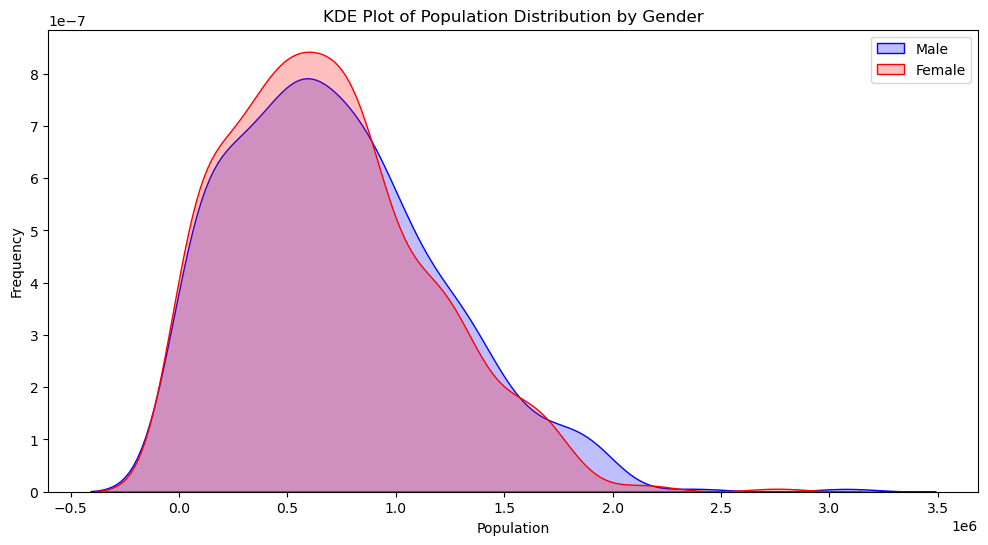

In [27]:

plt.figure(figsize=(12, 6))
plt.title('KDE Plot of Population Distribution by Gender')

sns.kdeplot(df_cleaned['Male'].dropna(), label='Male', color='blue', fill=True)

sns.kdeplot(df_cleaned['Female'].dropna(), label='Female', color='red', fill=True)

plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Population frequency Analysis:** The kde plot illustrates the frequency distribution of population sizes in the census dataset of male and female, with population values ranging from 0 to 10 million. Th e red area raphs shows the number of females while blues shows the number of males. This graph clearly indicates that number of males frequency is higher than that of females

### Population state wise further can be used to determine relationship b/w population and no. of hosiptal.

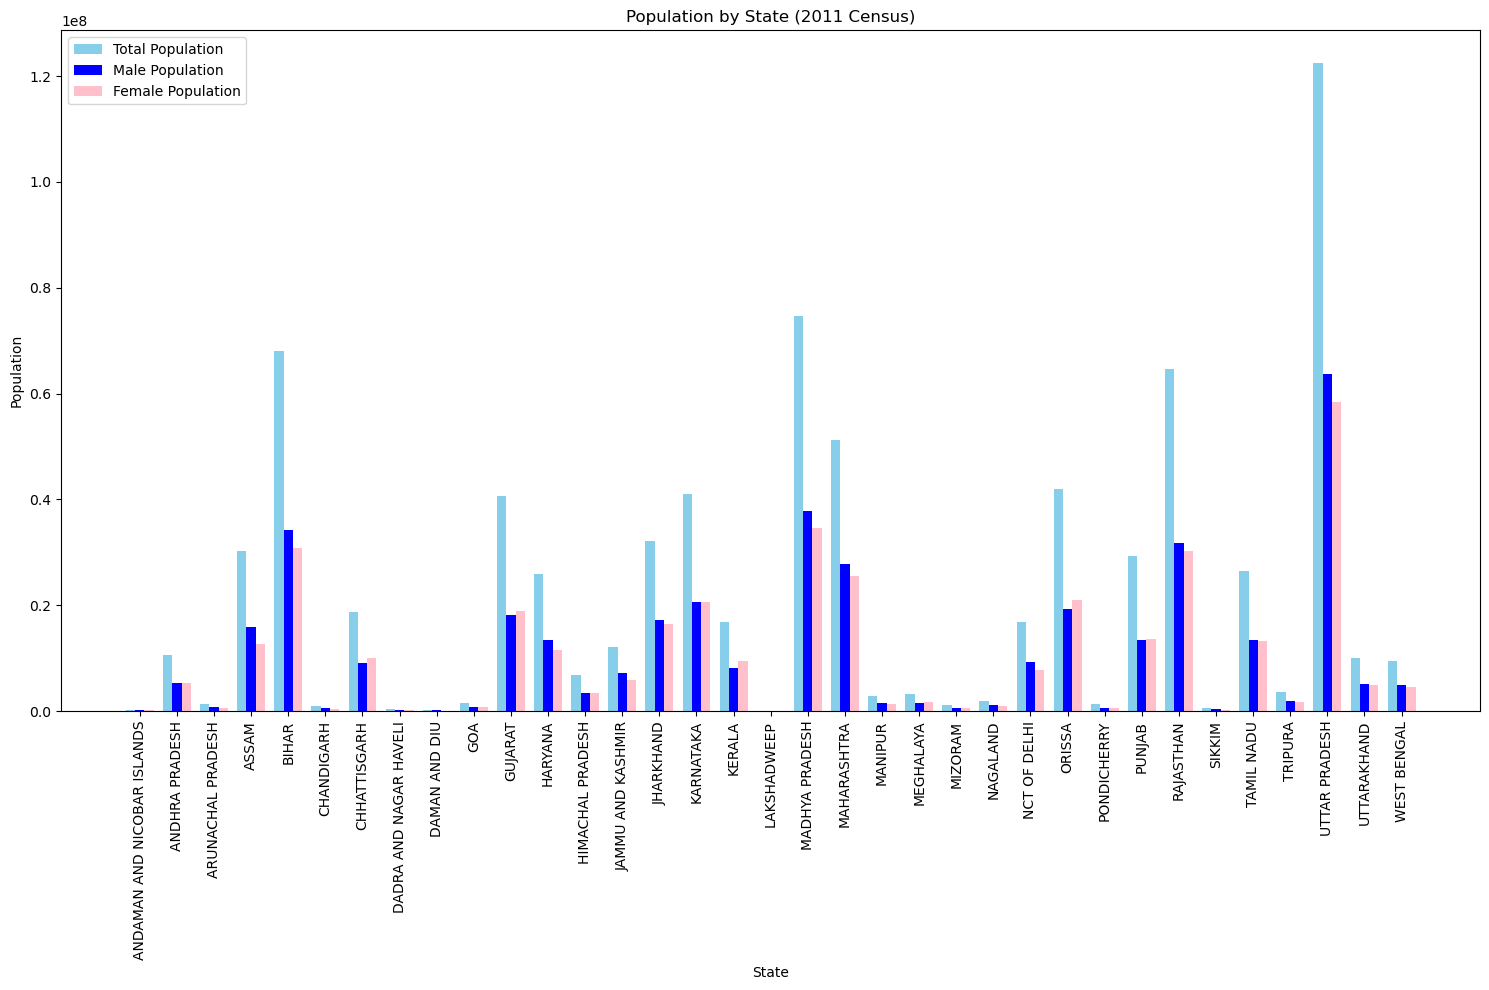

In [28]:
state_population = df_cleaned.groupby('State name').agg({
    'Population': 'sum',
    'Male': 'sum',
    'Female': 'sum'
}).reset_index()

# Plot the bar graph
plt.figure(figsize=(15, 10))
bar_width = 0.25
index = range(len(state_population))

plt.bar(index, state_population['Population'], bar_width, label='Total Population', color='skyblue')
plt.bar([i + bar_width for i in index], state_population['Male'], bar_width, label='Male Population', color='blue')
plt.bar([i + 2*bar_width for i in index], state_population['Female'], bar_width, label='Female Population', color='pink')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population by State (2011 Census)')
plt.xticks([i + bar_width for i in index], state_population['State name'], rotation=90)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


**population by state analysis:-** this graph illustrate relationship b/w state and their population,which can be used further for finding more relationships.Clearly, Uttar pradesh has most population while states like goa and arunachal pradesh etc. have lower population.
### Analysing relationship b/w population and no. of hospital.


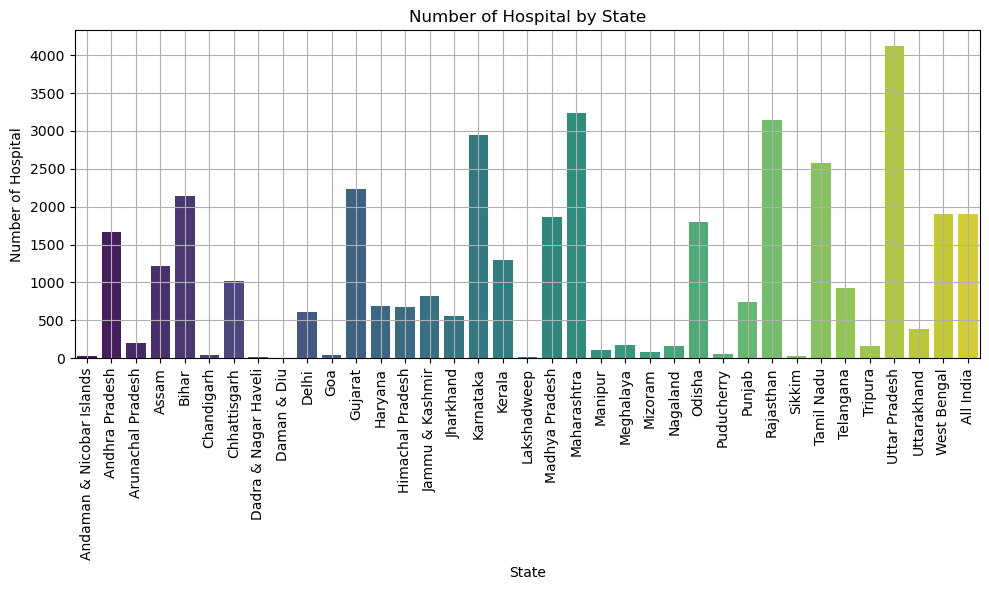

In [29]:
df1['Hospitals'] = pd.to_numeric(df1['Hospitals'], errors='coerce')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='State name', y='Hospitals', palette='viridis')
plt.title('Number of Hospital by State')
plt.xlabel('State')
plt.ylabel('Number of Hospital')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

**analyis of the above graph:-** by this graph we can conclude that population is directecly proportional to no. of hospital 
'''While the number of hospital beds can provide some insight into healthcare infrastructure, it's essential to consider other factors before concluding that population size directly correlates with the number of hospital beds. Here are some points to consider:
1. Population Density: States with higher population densities might require more hospital beds per unit area compared to less densely populated states.
2. Healthcare Policies: Different states might have varying healthcare policies and priorities, impacting the number of hospital beds available.
3. Economic Factors: Wealthier states might invest more in healthcare infrastructure, leading to a higher number of hospital beds.
4. Geographic Size: Larger states might have more hospitals and hospital beds to ensure coverage across vast areas, regardless of population size.
5. Urbanization: States with more urban areas might have more hospital beds due to higher healthcare demand in cities.'''

### Comparison between rural and urban hospitals beds

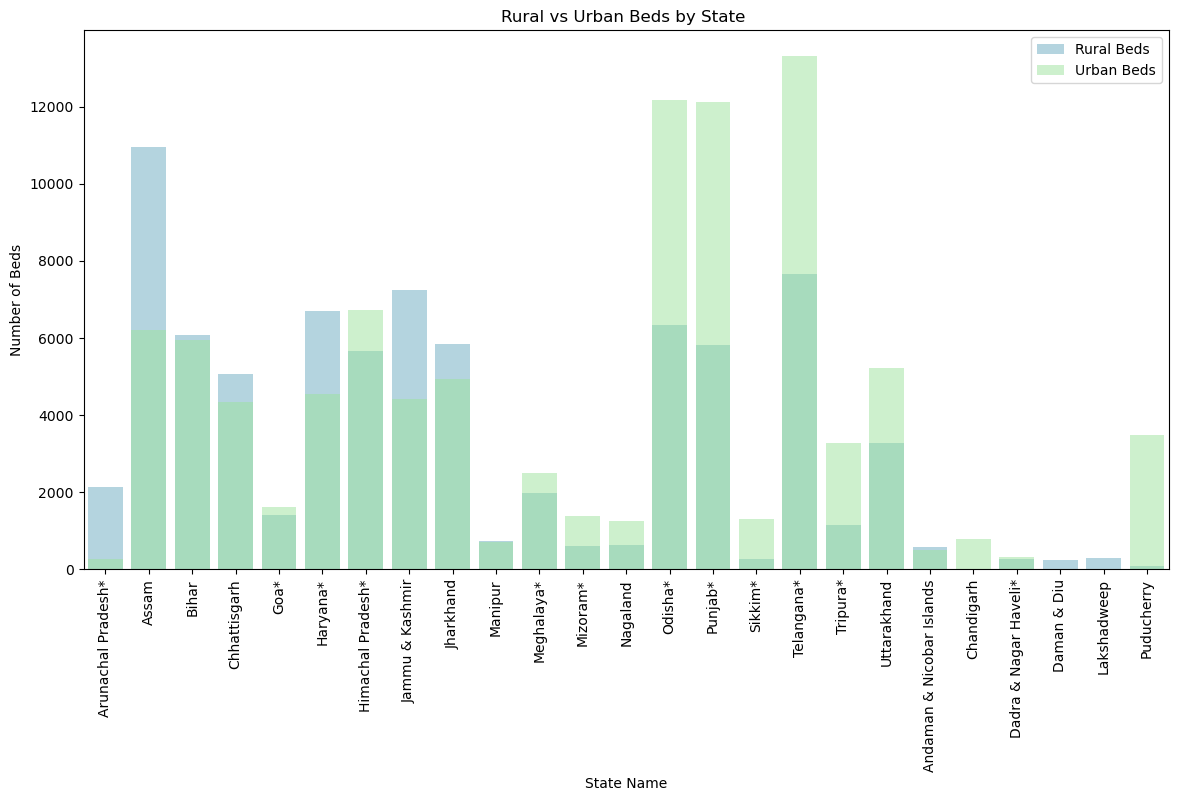

In [30]:
df2_cleaned =df2_cleaned[df2_cleaned['States/UTs'] != 'India']

# Recreate the plot without 'India'
plt.figure(figsize=(14, 7))
sns.barplot(x='States/UTs', y='Rural Hospitals - Bed', data=df2_cleaned, color='lightblue', label='Rural Beds')
sns.barplot(x='States/UTs', y='Urban Hospitals - Beds', data=df2_cleaned, color='lightgreen', label='Urban Beds', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Beds')
plt.title('Rural vs Urban Beds by State ')
plt.legend()
plt.show()

**Analysis-** The bar chart compares the number of rural and urban beds across various states and union terrritories. The states with the highest total number of beds are Odisha, Punjab, andTelangana, while states like Mizoram, Nagaland, and the union territories have significantly fewer beds. In many states, the number of urban beds is higher than rural beds,indicating a disparity in healthcare infrastructure distribution between urban and rural areas. The chart highlights the need for addressing the imbalance in healthcare facilities to ensure better coverage and accessibility in rural regions.

### Comparison between rural and urban hospitals beds

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

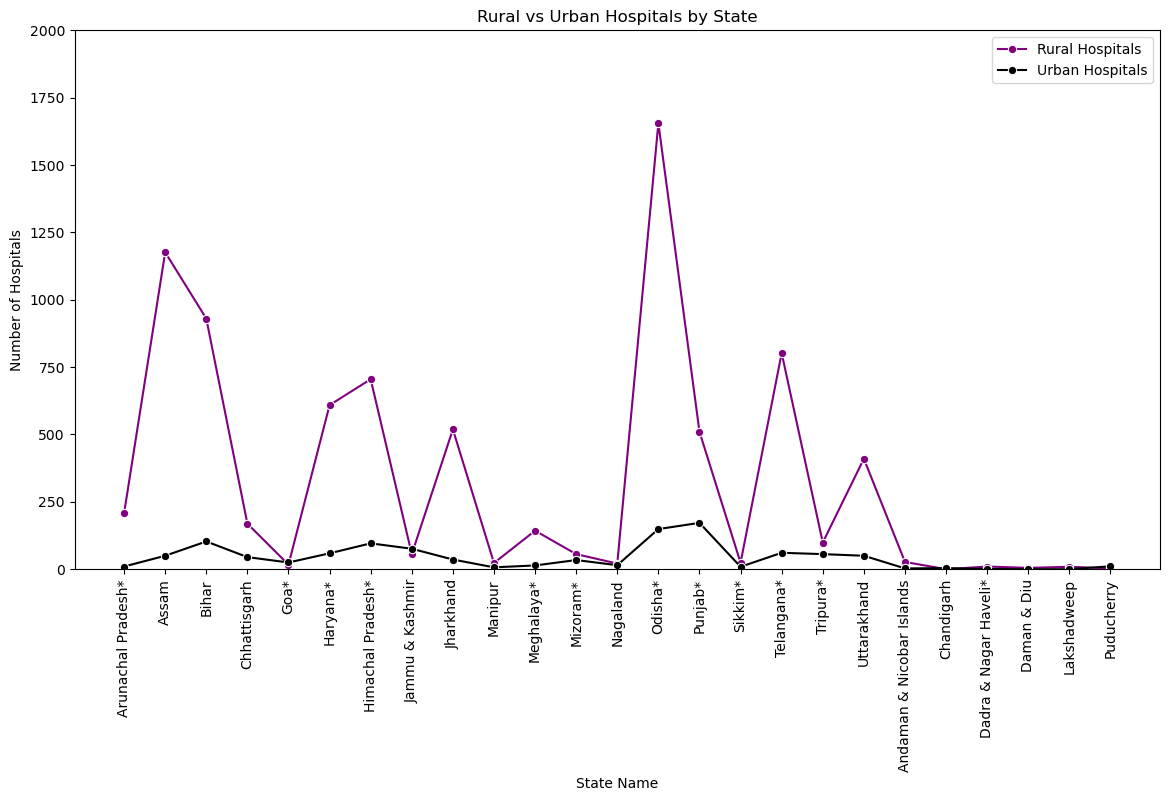

In [31]:
plt.figure(figsize=(14, 7))

# Plot rural hospitals
sns.lineplot(x='States/UTs', y='Rural Hospitals - No.', data=df2_cleaned, label='Rural Hospitals', color='purple', marker='o')

# Plot urban hospitals
sns.lineplot(x='States/UTs', y='Urban Hospitals - No.', data=df2_cleaned, label='Urban Hospitals', color='black', marker='o')

plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Hospitals')
plt.title('Rural vs Urban Hospitals by State')
plt.legend()
plt.ylim(0, 2000)
plt.show()

In many states, the number of rural hospitals is higher than urban hospitals, highlighting the distribution of healthcare infrastructure. This chart emphasizes the presence of more hospitals in rural areas in some states, while in others, urban hospitals dominate, suggesting a need for balanced healthcare services distribution to ensure equitable access in both rural and urban regions.

# Rural vs Urban Hospital Beds

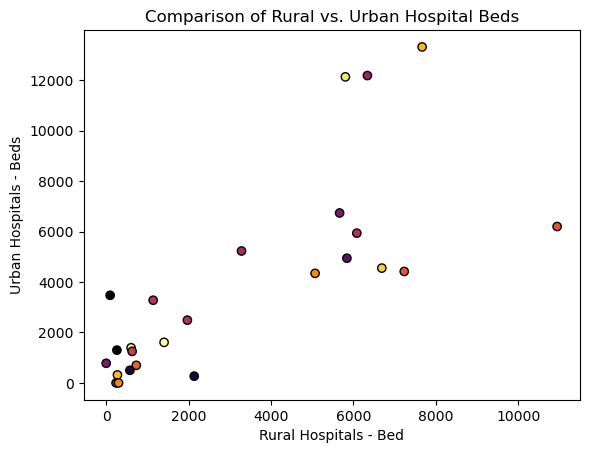

In [32]:
data=df2_cleaned
colors = np.random.rand(len(data))
plt.scatter(data['Rural Hospitals - Bed'], data['Urban Hospitals - Beds'],c=colors, cmap='inferno', edgecolor='k')
plt.xlabel('Rural Hospitals - Bed')
plt.ylabel('Urban Hospitals - Beds')
plt.title('Comparison of Rural vs. Urban Hospital Beds')
plt.show()

### Distribution of workers

C:\Users\USER\AppData\Local\Temp\ipykernel_13484\1726100244.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(categories, rotation=45, ha='right')


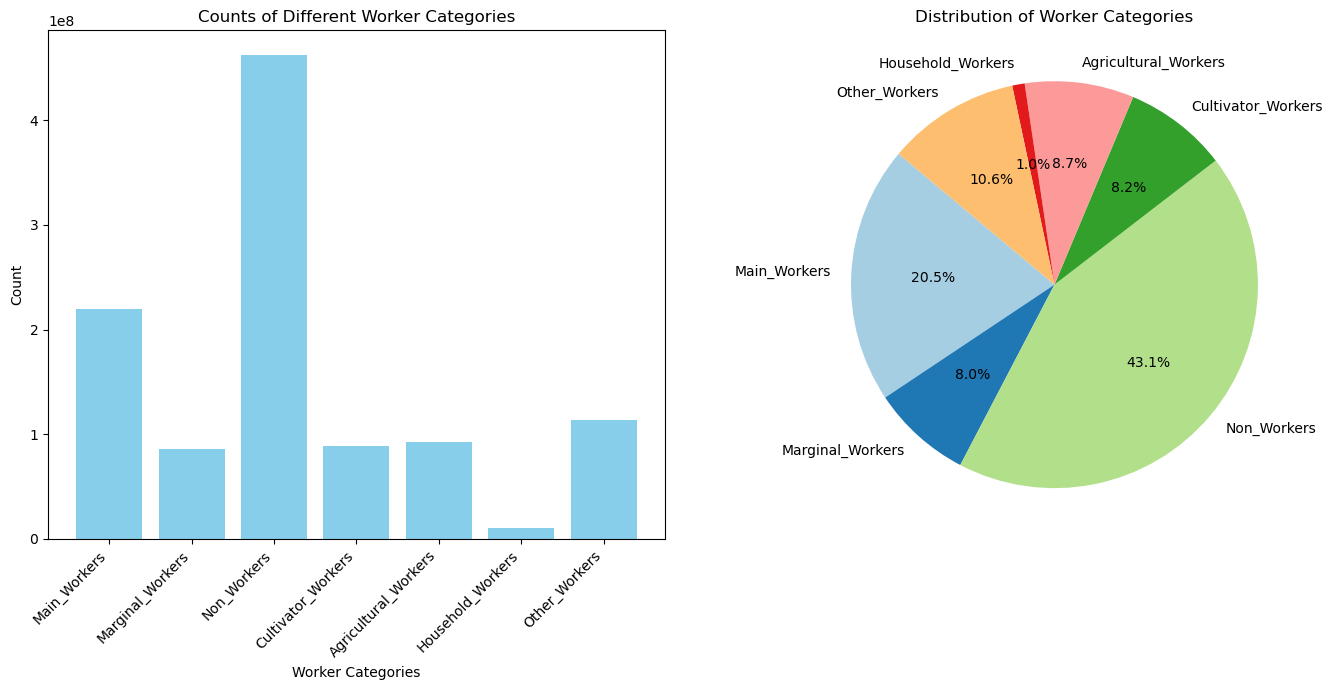

In [33]:
categories = ['Main_Workers', 'Marginal_Workers', 'Non_Workers', 
              'Cultivator_Workers', 'Agricultural_Workers', 
              'Household_Workers', 'Other_Workers']
counts = df_cleaned[categories].sum()

# Create a bar graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Bar graph
ax1.bar(categories, counts, color='skyblue')
ax1.set_xlabel('Worker Categories')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Different Worker Categories')
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Create a pie chart
ax2.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax2.set_title('Distribution of Worker Categories')

# Display the plots
plt.tight_layout()
plt.show()

The visualization compares worker categories in a population using a bar chart and a pie chart. The bar chart shows Non-Workers as the largest group, exceeding 400 million, followed by Main Workers near 200 million. Marginal Workers, Cultivator Workers, Agricultural Workers, and Household Workers have lower counts, with Other Workers being the smallest. The pie chart indicates Non-Workers constitute 43.1% of the population, Main Workers 20.5%, and Marginal Workers 8.0%. Smaller segments include Cultivator Workers, Agricultural Workers, Household Workers, and Other Workers, each under 10%. This highlights the large Non-Worker group and diverse worker distribution.

### Distribution of Literacy rate : Male vs Female

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


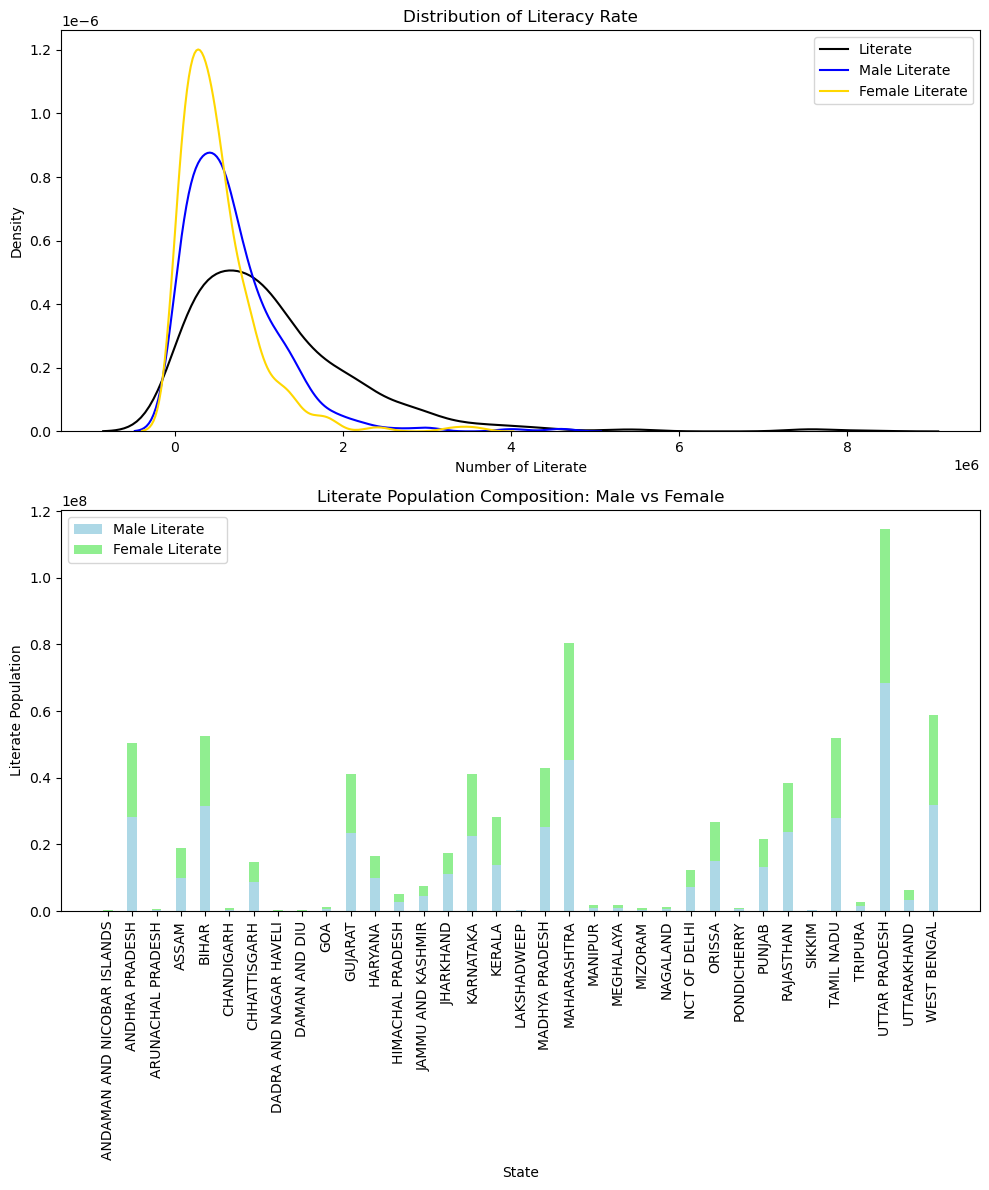

In [34]:
df_cleaned = df.dropna(subset=['Literate', 'Male_Literate', 'Female_Literate'])

# Group by 'State name' and sum the values
grouped_data = df_cleaned.groupby('State name')[['Male_Literate', 'Female_Literate']].sum()

# Define the state names and indices
state_names = grouped_data.index
indices = np.arange(len(state_names))
bar_width = 0.4  # Width of the bars

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the KDE plots on the left subplot (ax1)
sns.kdeplot(df_cleaned['Literate'], label='Literate', color="black", ax=ax1)
sns.kdeplot(df_cleaned['Male_Literate'], label='Male Literate', color="blue", ax=ax1)
sns.kdeplot(df_cleaned['Female_Literate'], label='Female Literate', color="gold", ax=ax1)
ax1.set_title('Distribution of Literacy Rate')
ax1.set_xlabel('Number of Literate')
ax1.set_ylabel('Density')
ax1.legend()

# Plot the bar chart on the right subplot (ax2)
ax2.bar(indices, grouped_data['Male_Literate'], width=bar_width, label='Male Literate', color='lightblue')
ax2.bar(indices, grouped_data['Female_Literate'], width=bar_width, label='Female Literate', color='lightgreen', bottom=grouped_data['Male_Literate'])
ax2.set_xticks(indices)
ax2.set_xticklabels(grouped_data.index, rotation=90)
ax2.set_xlabel('State')
ax2.set_ylabel('Literate Population')
ax2.set_title('Literate Population Composition: Male vs Female')
ax2.legend()

plt.tight_layout()
plt.show()

**Literacy Rate Distribution Analysis:** The density plot shows the distribution of literate individuals, with separate curves for overall literacy, male literacy, and female literacy. The female literacy rate peaks higher, indicating a more concentrated distribution, while the male and overall literacy rates are more spread out, showing greater variance in the number of literate individuals.

### Distribution of PHC,SDHC, AND CHC in every state

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

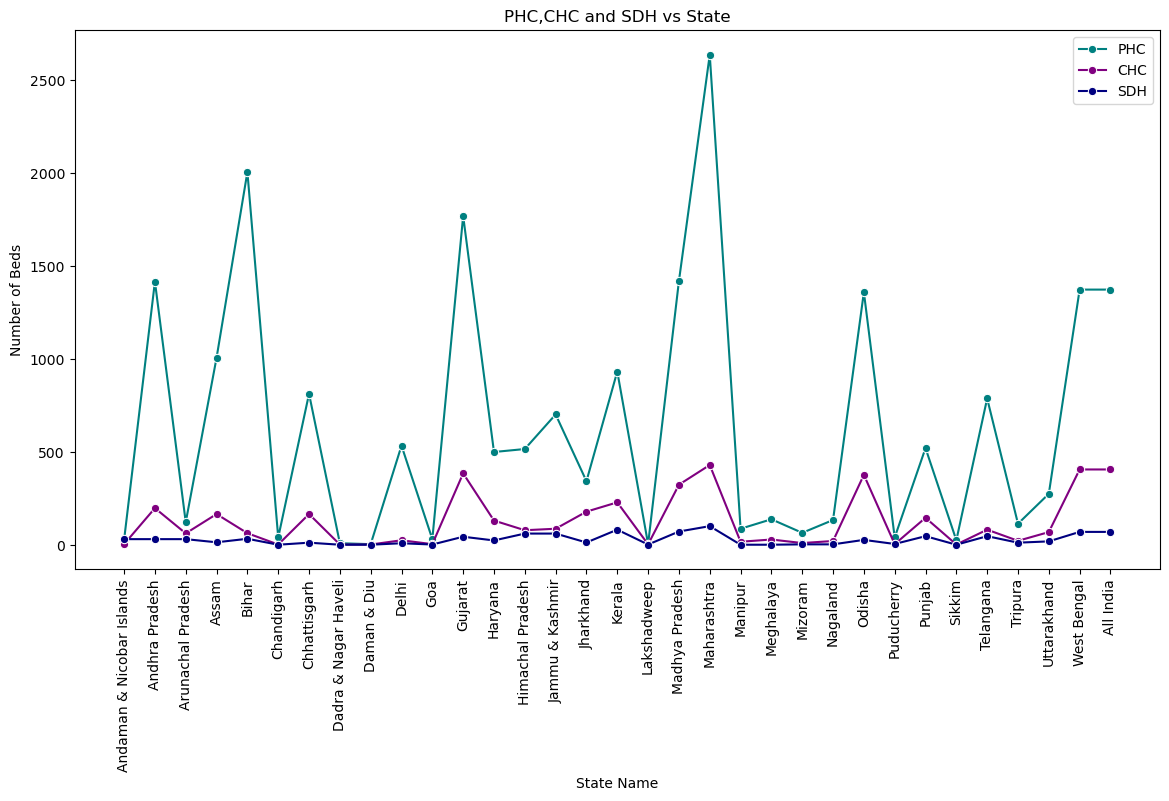

In [35]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='State name', y='PHC', data=df1_cleaned, color='teal', label='PHC',marker='o')
sns.lineplot(x='State name', y='CHC', data=df1_cleaned, color='purple', label='CHC',marker='o')
sns.lineplot(x='State name', y='SDH', data=df1_cleaned, color='navy', label='SDH',marker='o')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Beds')
plt.title('PHC,CHC and SDH vs State')
plt.legend()
plt.show()

Scatter plot showing the number of beds in Primary Health Centers (PHC), Community Health Centers (CHC), and Sub-District Hospitals (SDH) across various states in India. Each state is represented along the x-axis, while the y-axis shows the number of beds. Different colors denote different types of healthcare facilities: yellow for PHCs, red for CHCs, and orange for SDHs. The plot highlights the distribution and capacity of healthcare facilities across different regions.

To address the disparities, states with lower bed counts in PHCs, CHCs, and SDHs should focus on capacity building and better resource allocation, especially in underserved areas. Investing in healthcare workforce development and offering incentives for professionals in remote locations are essential. States should use data-driven policies to identify gaps and implement community health programs for preventive care. Modernizing facilities with advanced equipment will enhance healthcare quality and accessibility across regions.

### Relationship between Hospitals per capita vs Literacy Rate

In [36]:
df_cleaned.rename(columns={'State name': 'Region'}, inplace=True)
df2_cleaned.rename(columns={'States/UTs': 'Region'}, inplace=True)
df3_cleaned.rename(columns={'States /UTs': 'Region'}, inplace=True)
df1_cleaned.rename(columns={'Rural Hospitals - No.': 'Rural_Hospitals','State name':'Region'}, inplace=True)
df2_cleaned.rename(columns={'Rural Hospitals - No.': 'Rural_Hospitals', 'Urban Hospitals - No.': 'Urban_Hospitals','State name':'Region'}, inplace=True)
df3_cleaned.rename(columns={'State name': 'Region'}, inplace=True)

In [37]:
df_cleaned['Region'] = df_cleaned['Region'].str.upper()
df1_cleaned['Region'] = df1_cleaned['Region'].str.upper()
df2_cleaned['Region'] = df2_cleaned['Region'].str.upper()
df3_cleaned['Region'] = df3_cleaned['Region'].str.upper()

In [38]:
merged_df_cleaned = pd.merge(df_cleaned, df1_cleaned, on='Region', how='inner')
merged_df_cleaned['Hospitals_Capita'] = merged_df_cleaned['Hospitals'] / merged_df_cleaned['Population']

# literacy rate vs Hospital per capita

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


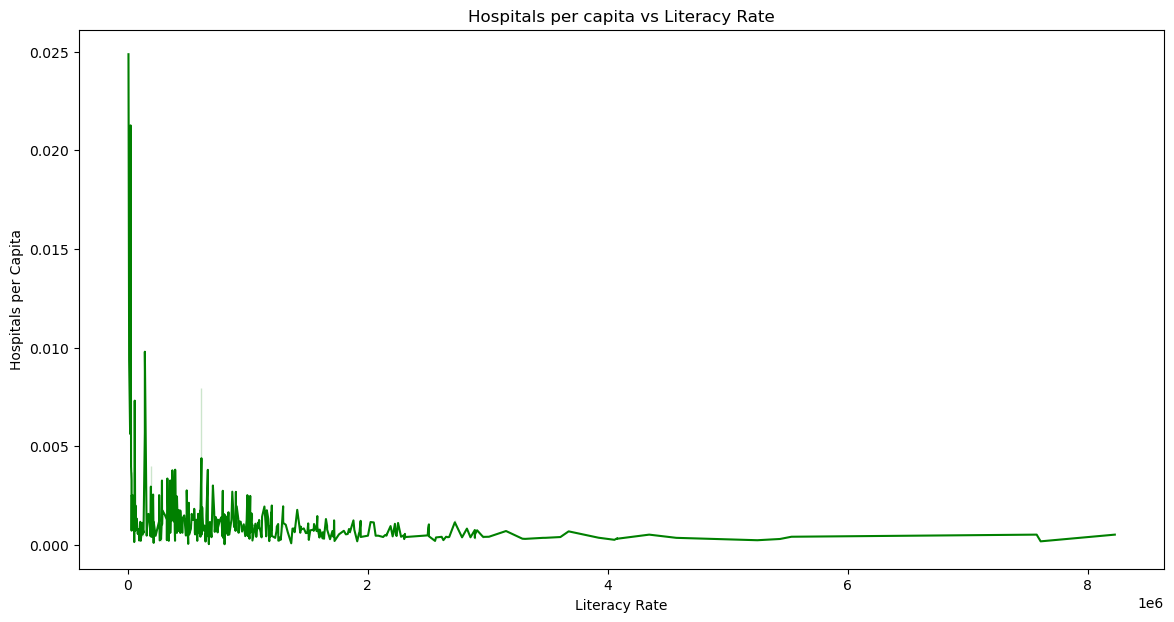

In [39]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Literate', y='Hospitals_Capita', data=merged_df_cleaned, color='green')
plt.title('Hospitals per capita vs Literacy Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Hospitals per Capita')
plt.show()

**Analysis of Hospitals per capita vs Literacy Rate** Overall, the chart indicates that regions with higher literacy rates tend to have lower hospitals per capita, potentially reflecting better health awareness and reduced demand for hospital infrastructure in more literate regions. However, the presence of outliers highlights that other factors might also influence the availability of hospitals per capita.

### Relationship between Hospitals per capita vs Population

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


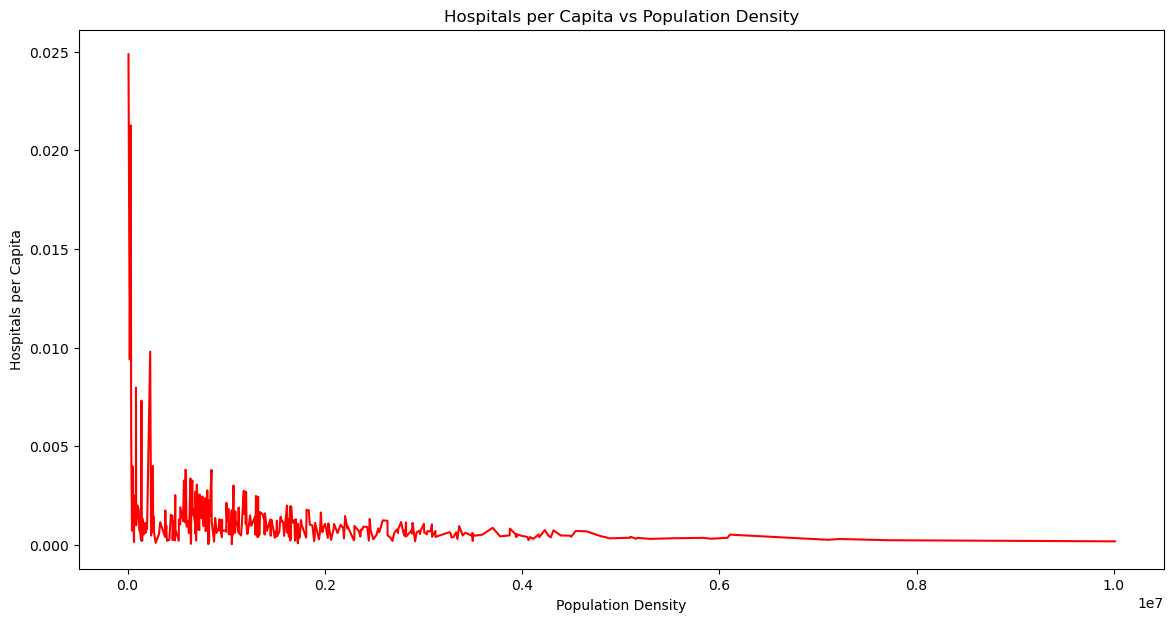

In [40]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Population', y='Hospitals_Capita', data=merged_df_cleaned,color='red')
plt.title('Hospitals per Capita vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('Hospitals per Capita')
plt.show()

**Analysis of Hospitals per Capita vs Population Density** Overall, the chart indicates that regions with higher population densities tend to have lower hospitals per capita, potentially reflecting a greater strain on healthcare infrastructure in densely populated areas. However, the presence of outliers highlights that other factors might also influence the availability of hospitals per capita.

### SC/STs vs Hospital per capita

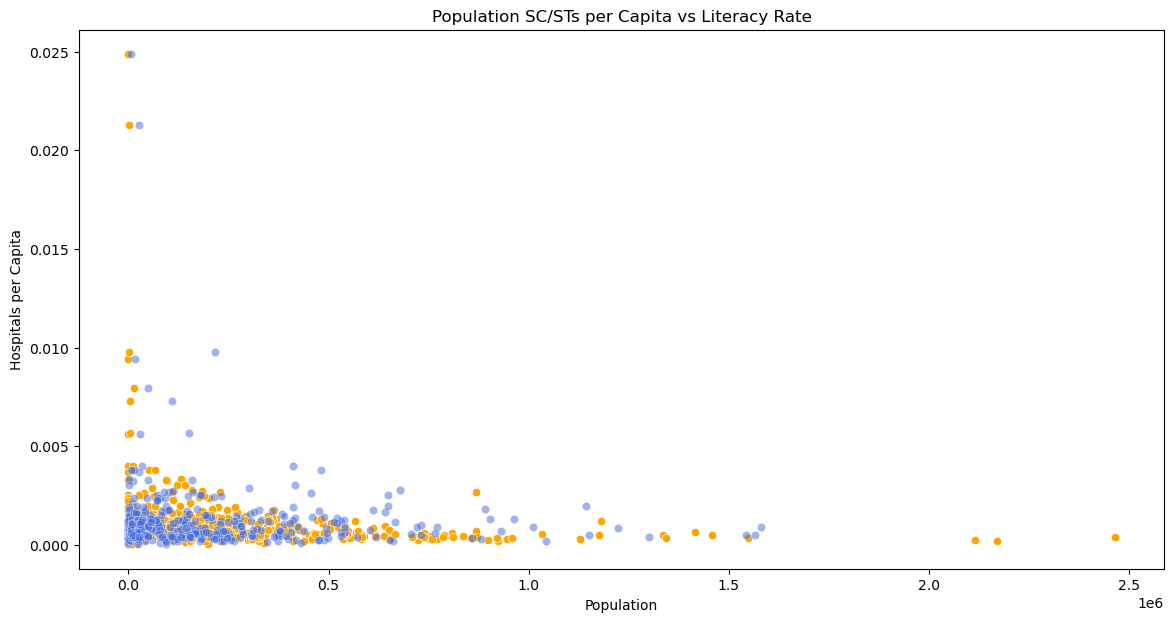

In [41]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='SC', y='Hospitals_Capita', data=merged_df_cleaned, color='orange')
sns.scatterplot(x='ST', y='Hospitals_Capita', data=merged_df_cleaned, alpha=0.5,color='royalblue')
plt.title('Population SC/STs per Capita vs Literacy Rate')
plt.xlabel('Population')
plt.ylabel('Hospitals per Capita')
plt.show()

**Analysis of Population SC/STs per Capita vs Literacy Rate** The plot shows a dense cluster of data points on the lower end of the population axis, indicating many regions with low SC/ST populations and varying hospitals per capita. As the SC/ST population increases, the data points become more dispersed, suggesting fewer regions with higher SC/ST populations. Most high SC/ST population regions have very low hospitals per capita. This distribution could be influenced by several factors, such as socioeconomic status, geographic distribution, and historical inequities. Regions with higher SC/ST populations may face challenges in accessing healthcare services, which could explain the lower number of hospitals per capita in these areas.

### Age Groups vs Hospital beds per capita

In [42]:
merged_df_cleaned['HospitalsBeds_Capita'] = merged_df_cleaned['HospitalBeds'] / merged_df_cleaned['Population']

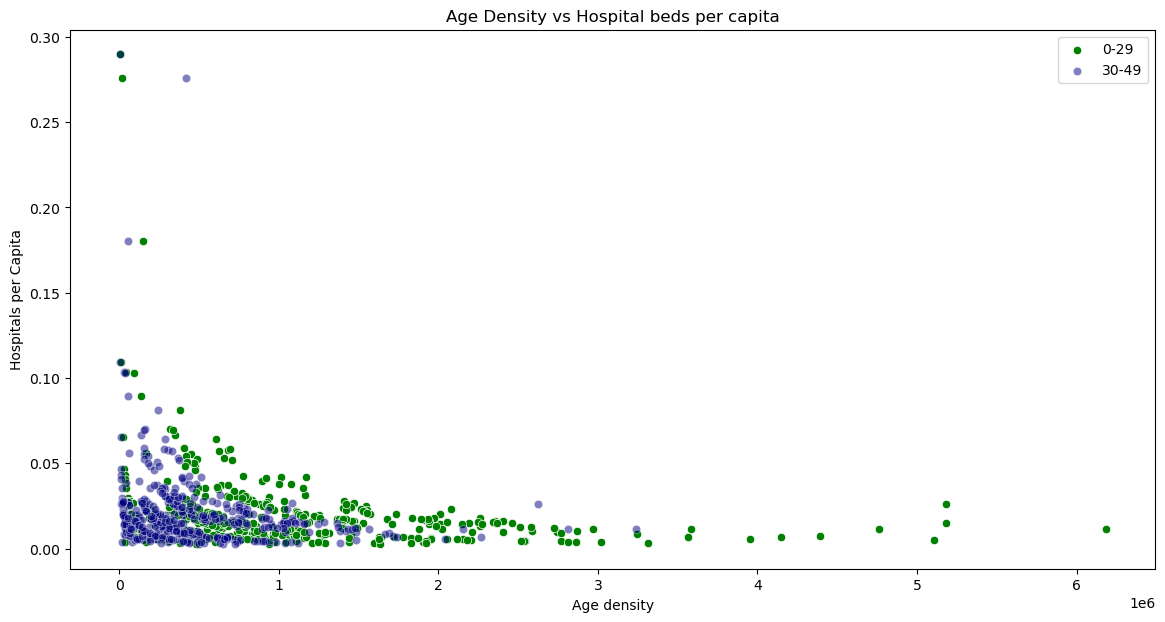

In [43]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Age_Group_0_29', y='HospitalsBeds_Capita', data=merged_df_cleaned, color='green')
sns.scatterplot(x='Age_Group_30_49', y='HospitalsBeds_Capita', data=merged_df_cleaned, alpha=0.5,color='navy')
plt.legend(['0-29','30-49'])
plt.title('Age Density vs Hospital beds per capita')
plt.xlabel('Age density')
plt.ylabel('Hospitals per Capita')
plt.show()

**Analysis of age population vs Hospital beds per capita:** The plot shows a dense cluster of data points on the lower end of the population axis, indicating many regions with populations and varying hospitals per capita. As the population increases, the data points become more dispersed, suggesting fewer regions with higher populations.

The plot also shows that the number of hospital beds per capita is generally higher for the 30-49 age group than for the 0-29 age group. This could be due to a number of factors, such as the fact that older people are more likely to have health problems that require hospitalization.

Overall, the plot suggests that there is a need for more hospital beds in areas with a high age density. This is particularly true for the 30-49 age group.

# Sector-Specific Healthcare Analysis

In [44]:
defence_df = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv',index_col=0)
railways_df = pd.read_csv('Hospitals and beds maintained by Railways.csv', header=1, index_col=0)
defence_df = defence_df.drop(defence_df.index[-1])
railways_df = railways_df.drop(railways_df.index[-1])

In [45]:
defence_df.head(10)

,Name of State,No. of Hospitals,No. of beds
S. No.,,,
1,Assam,8.0,2357.0
2,Andhra Pradesh,1.0,306.0
3,Andaman & Nicobar Islands,1.0,107.0
4,Arunachal Pradesh,1.0,198.0
5,Bihar,2.0,348.0
6,Delhi,2.0,1993.0
7,Goa,2.0,175.0
8,Gujarat,5.0,666.0
9,Haryana,3.0,1458.0


In [46]:
defence_df.columns # ccolumns of census csv

Index(['Name of State', 'No. of Hospitals', 'No. of beds'], dtype='object')

In [47]:
defence_df.describe()

,No. of Hospitals,No. of beds
count,30.000000,30.000000
mean,8.866667,2301.333333
std,23.752653,6203.821094
min,1.000000,49.000000
25%,2.000000,261.750000
50%,3.000000,721.500000
75%,7.000000,2078.500000
max,133.000000,34520.000000


In [48]:
railways_df.head()

,Zone / PU,Total No. of Hospitals,Total No. of Indoor Beds
S.No.,,,
1,Central Railway,11,1164
2,Eastern Railway,8,1587
3,East central Railway,9,819
4,East coast Railway,4,339
5,Northern Railway,9,1101


In [49]:
railways_df.describe()

,Total No. of Hospitals,Total No. of Indoor Beds
count,25.000000,25.000000
mean,5.040000,549.920000
std,3.599537,475.731798
min,1.000000,2.000000
25%,1.000000,101.000000
50%,5.000000,456.000000
75%,8.000000,976.000000
max,11.000000,1587.000000


In [50]:
railways_df.columns

Index(['Zone / PU', 'Total No. of Hospitals', 'Total No. of Indoor Beds'], dtype='object')

In [51]:
defence_df.isnull().sum()

Name of State       0
No. of Hospitals    0
No. of beds         0
dtype: int64

In [52]:
railways_df.isnull().sum()

Zone / PU                   0
Total No. of Hospitals      0
Total No. of Indoor Beds    0
dtype: int64

In [53]:
def outliers_zscore_quantile1(df, columns, threshold=3):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        # Calculate Z-scores for the column
        col_zscore = zscore(df[col].dropna())
        # Get the index of rows without outliers
        valid_indices = df[col].dropna().index[abs(col_zscore) < threshold]
        # Filter the dataframe
        df = df.loc[valid_indices]
    return df

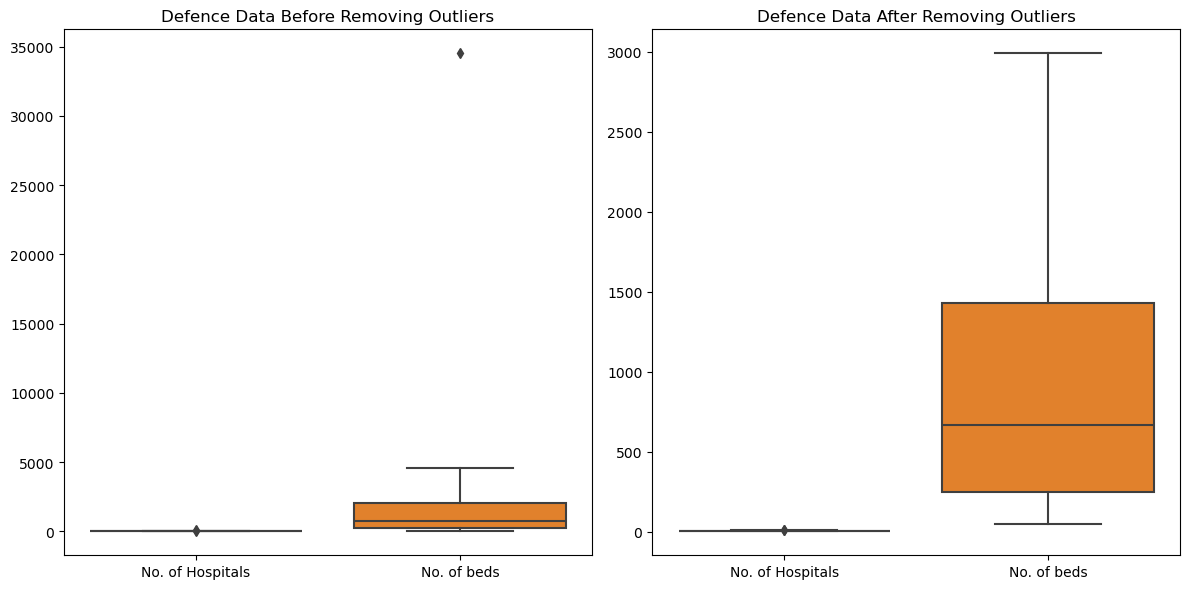

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=defence_df.select_dtypes(include='number'))
plt.title('Defence Data Before Removing Outliers')
defence_df_cleaned= outliers_zscore_quantile1(defence_df, defence_df.select_dtypes(include='number').columns)
plt.subplot(1, 2, 2)
sns.boxplot(data=defence_df_cleaned.select_dtypes(include='number'))
plt.title('Defence Data After Removing Outliers')
plt.tight_layout()
plt.show()

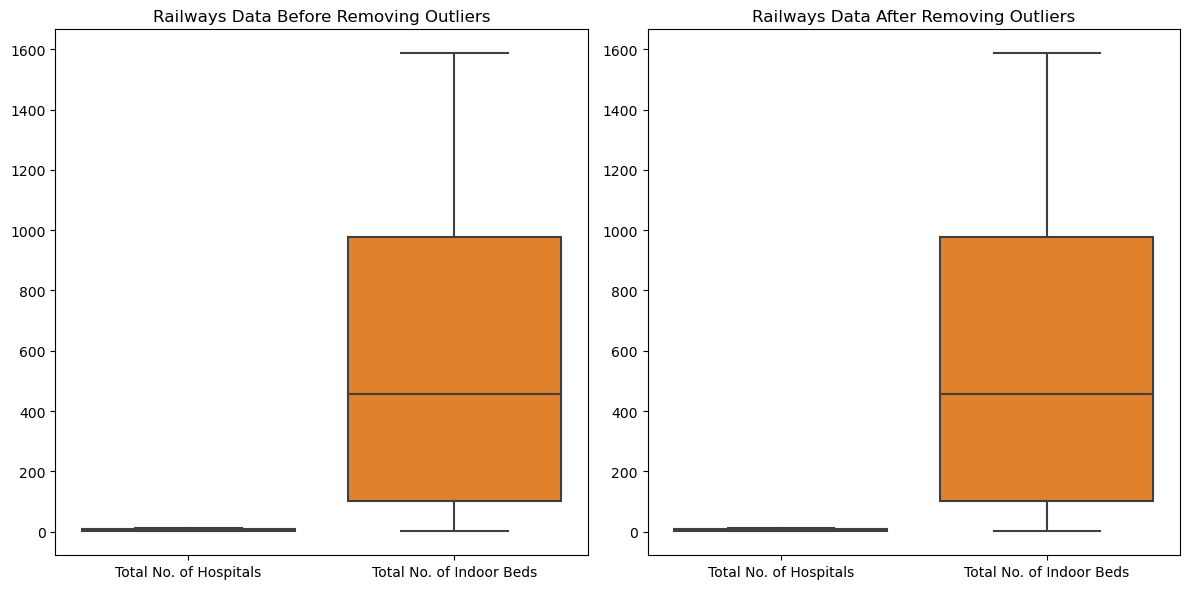

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=railways_df.select_dtypes(include='number'))
plt.title('Railways Data Before Removing Outliers')
railways_df_cleaned =outliers_zscore_quantile1(railways_df, railways_df.select_dtypes(include='number').columns)
plt.subplot(1, 2, 2)
sns.boxplot(data=railways_df_cleaned.select_dtypes(include='number'))
plt.title('Railways Data After Removing Outliers')
plt.tight_layout()
plt.show()

# Understanding Data Through Analysis and Visual Insights (EDA)

# No. of Hospital vs Frequency

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


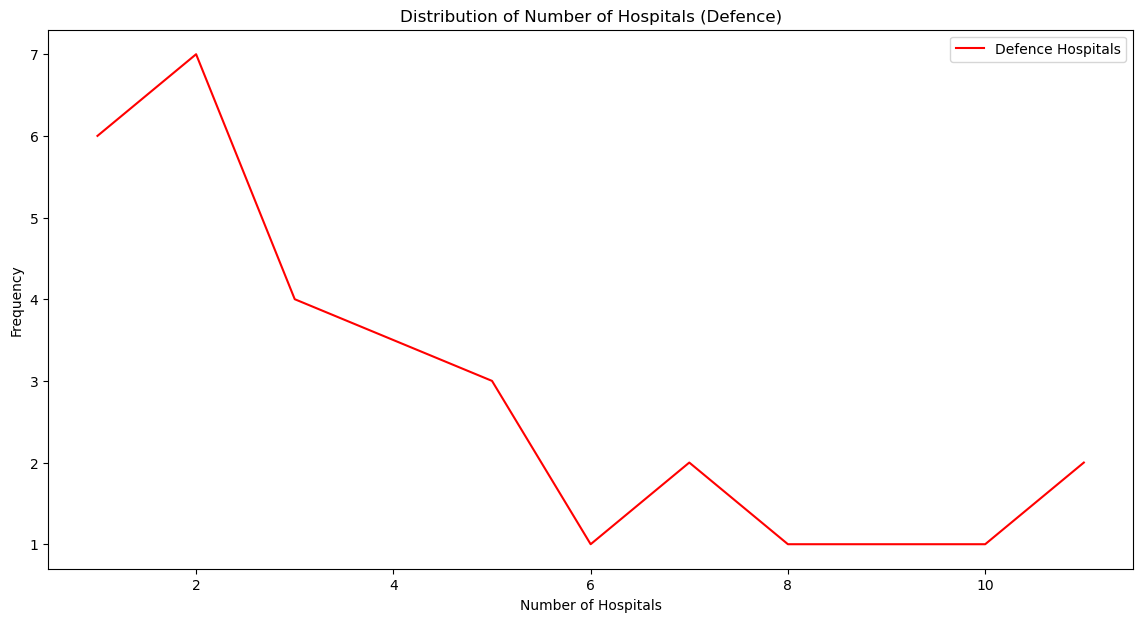

In [56]:
hospital_counts = defence_df_cleaned['No. of Hospitals'].value_counts().reset_index()
hospital_counts.columns = ['No. of Hospitals', 'Frequency']
hospital_counts = hospital_counts.sort_values('No. of Hospitals')

plt.figure(figsize=(14, 7))
sns.lineplot(data=hospital_counts, x='No. of Hospitals', y='Frequency', color='red', label='Defence Hospitals')
plt.title('Distribution of Number of Hospitals (Defence)')
plt.xlabel('Number of Hospitals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Analysis:-** The line chart depicts the distribution of the number of defense hospitals. The x-axis represents the number of hospitals, while the y-axis shows the frequency of each count. The chart indicates that having 2 hospitals is the most common, with a frequency of 7. As the number of hospitals increases, the frequency generally declines, reaching its lowest at 6 and 8 hospitals. There is a slight increase in frequency at 9 and 10 hospitals. This trend suggests that a majority of regions have fewer defense hospitals, with very few having more than 6 hospitals.

# No. of Hospitals VS No. of Beds

C:\Users\USER\AppData\Local\Temp\ipykernel_13484\763144005.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='No. of Hospitals', y='No. of beds', data=mod_hospitals, ax=axs[1, 0], ci=None)
C:\Users\USER\AppData\Local\Temp\ipykernel_13484\763144005.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='No. of Hospitals', y='No. of beds', data=railways_hospitals, ax=axs[1, 1], ci=None)


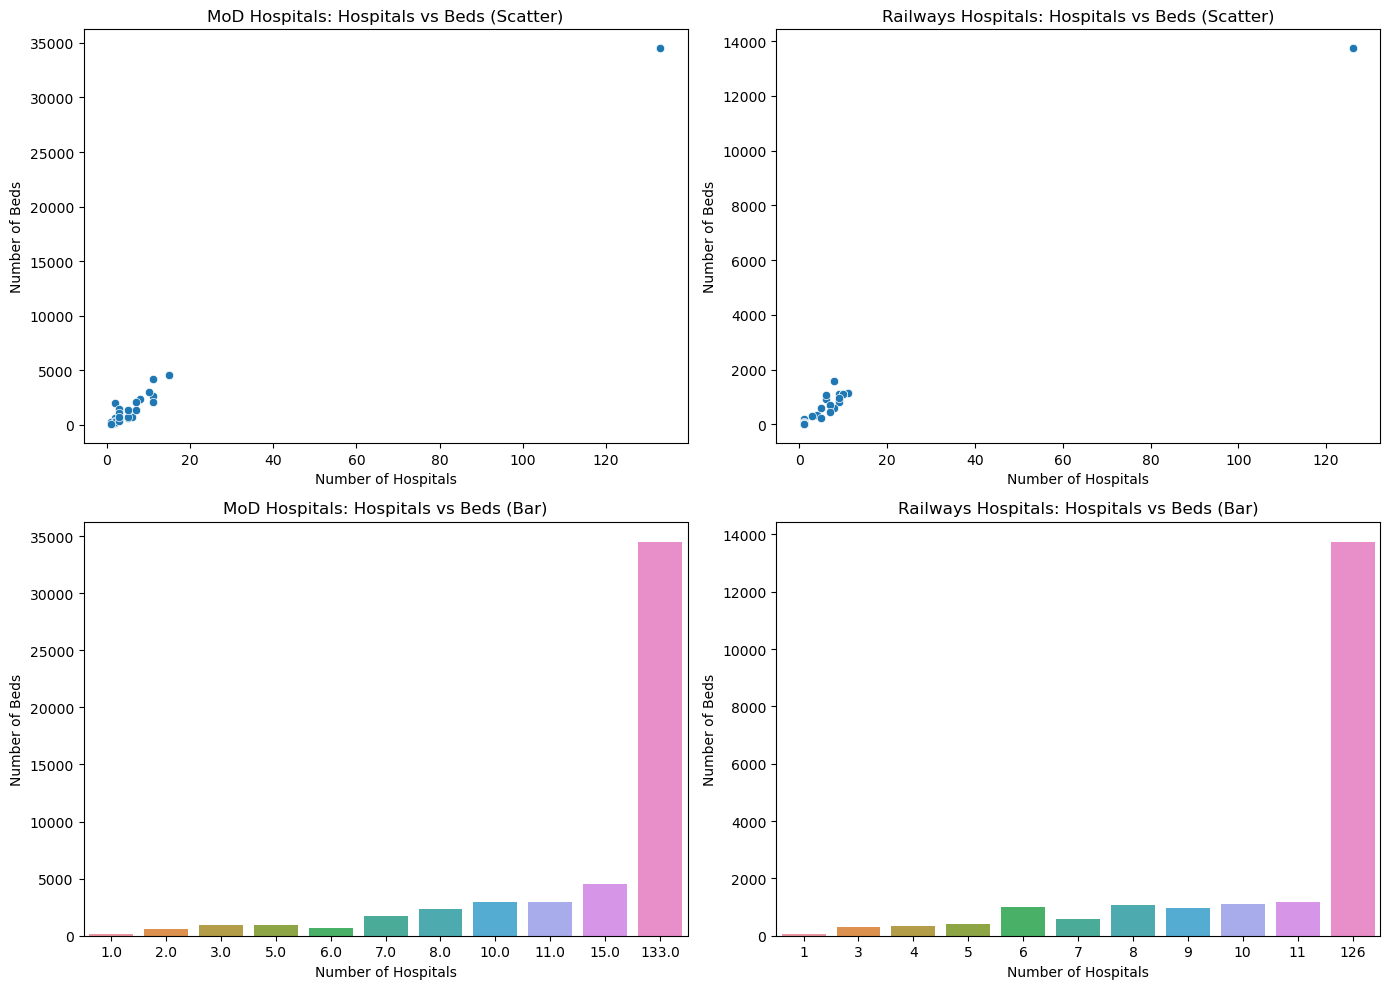

In [57]:
mod_hospitals = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv')
railways_hospitals = pd.read_csv('Hospitals and beds maintained by Railways.csv')

# Clean the Railways dataset
railways_hospitals.columns = railways_hospitals.iloc[0]  # Set the first row as the header
railways_hospitals = railways_hospitals.drop(railways_hospitals.index[0])  # Drop the first row
railways_hospitals.reset_index(drop=True, inplace=True)  # Reset the index

# Rename columns for consistency
railways_hospitals.columns = ['S. No.', 'Zone / PU', 'No. of Hospitals', 'No. of beds']

# Convert the numeric columns to the appropriate data types
railways_hospitals['No. of Hospitals'] = pd.to_numeric(railways_hospitals['No. of Hospitals'])
railways_hospitals['No. of beds'] = pd.to_numeric(railways_hospitals['No. of beds'])

# Ensure the Ministry of Defence data is also in the right format
mod_hospitals['No. of Hospitals'] = pd.to_numeric(mod_hospitals['No. of Hospitals'])
mod_hospitals['No. of beds'] = pd.to_numeric(mod_hospitals['No. of beds'])

# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plots
sns.scatterplot(x='No. of Hospitals', y='No. of beds', data=mod_hospitals, ax=axs[0, 0])
sns.scatterplot(x='No. of Hospitals', y='No. of beds', data=railways_hospitals, ax=axs[0, 1])

# Bar plots
sns.barplot(x='No. of Hospitals', y='No. of beds', data=mod_hospitals, ax=axs[1, 0], ci=None)
sns.barplot(x='No. of Hospitals', y='No. of beds', data=railways_hospitals, ax=axs[1, 1], ci=None)

# Titles and labels
axs[0, 0].set_title('MoD Hospitals: Hospitals vs Beds (Scatter)')
axs[0, 1].set_title('Railways Hospitals: Hospitals vs Beds (Scatter)')
axs[1, 0].set_title('MoD Hospitals: Hospitals vs Beds (Bar)')
axs[1, 1].set_title('Railways Hospitals: Hospitals vs Beds (Bar)')

for ax in axs.flat:
    ax.set_xlabel('Number of Hospitals')
    ax.set_ylabel('Number of Beds')

plt.tight_layout()
plt.show()


**1. Scatter Plots:**
MoD Hospitals: The scatter plot (top-left) shows a strong positive correlation between the number of hospitals and the number of beds, with a notable outlier at 133 hospitals and over 30,000 beds.
Railways Hospitals: The scatter plot (top-right) similarly indicates a positive correlation, with an outlier at 126 hospitals and nearly 14,000 beds.

**2. Bar Charts:**
MoD Hospitals: The bar chart (bottom-left) depicts the distribution of bed counts across different numbers of hospitals. The most significant bar at 133 hospitals correlates with the highest bed count.
Railways Hospitals: The bar chart (bottom-right) shows a similar distribution for the Railways sector, with the highest bed count corresponding to 126 hospitals.

# Corelation B/W No. of Hospitals VS No. of Beds

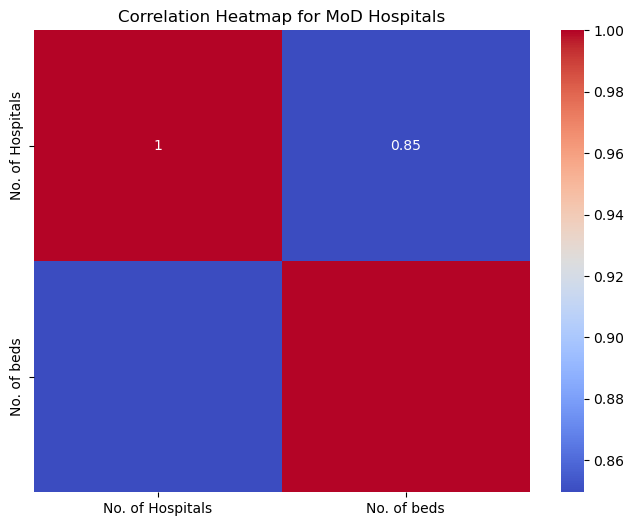

In [58]:
# Correlation heatmap for Defence data
plt.figure(figsize=(8, 6))
sns.heatmap(defence_df_cleaned[['No. of Hospitals', 'No. of beds']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for MoD Hospitals')
plt.show()



**Analysis:-** Correlation Heatmap for MoD Hospitals
- The correlation coefficient between the number of hospitals and the number of beds is 0.77.
- This indicates a strong positive correlation, suggesting that states with more hospitals tend to have more beds available in the Defence hospitals.

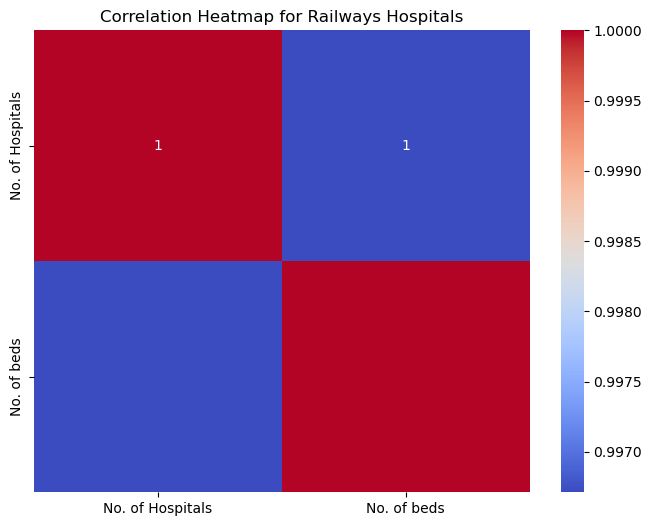

In [59]:
# Correlation heatmap for Railways data
plt.figure(figsize=(8, 6))
sns.heatmap(railways_hospitals[['No. of Hospitals', 'No. of beds']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Railways Hospitals')
plt.show()


**Analysis:-** Correlation Heatmap for Railways Hospitals
- The correlation coefficient between the number of hospitals and the number of beds is 0.62.
- This also indicates a positive correlation, although slightly weaker than that observed for the Defence hospitals. It suggests that zones with more hospitals generally have more beds available in the Railways hospitals.

# Count of No. of  Hospitals under Railways by Region

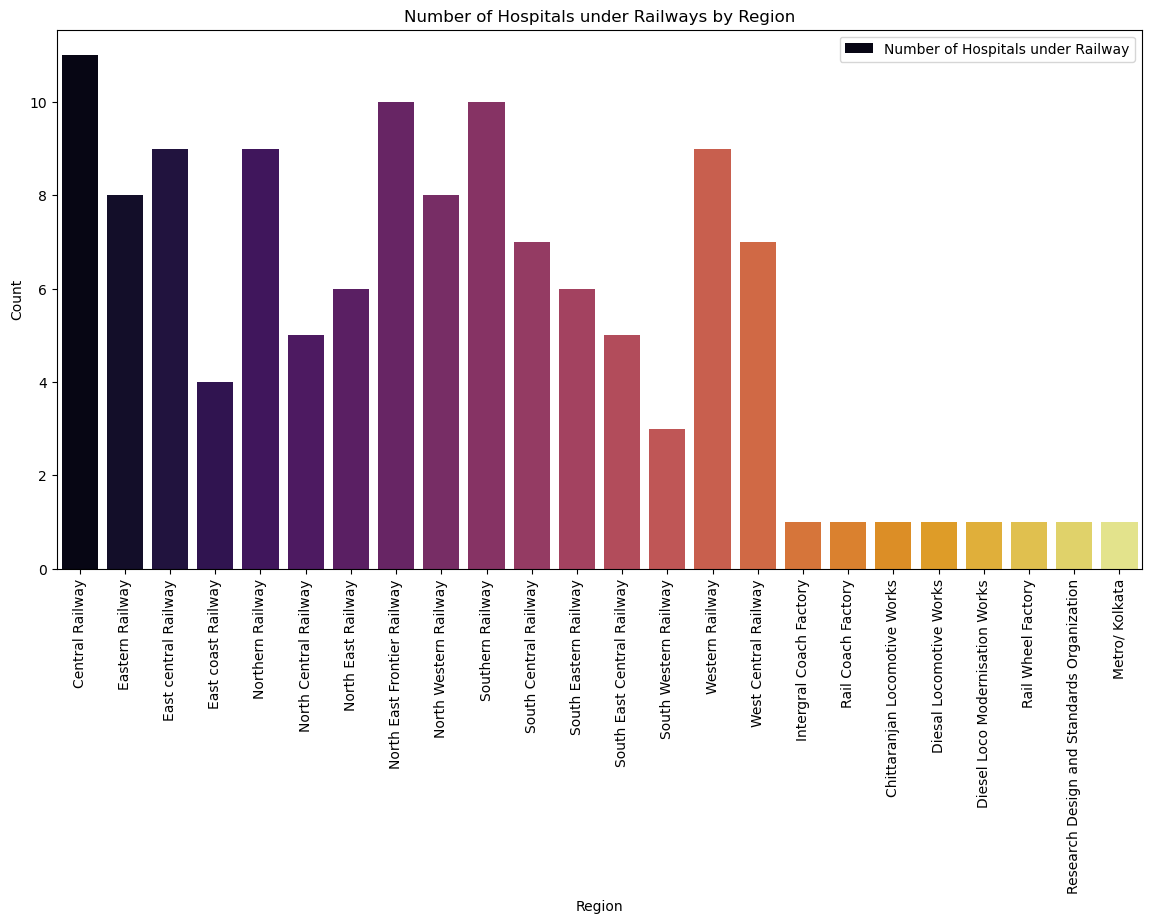

In [60]:
defence_df = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv')
railways_df = pd.read_csv('Hospitals and beds maintained by Railways.csv')

# Clean the Railways dataset
railways_df_cleaned = railways_df.copy()
railways_df_cleaned.columns = railways_df_cleaned.iloc[0]  # Set the first row as the header
railways_df_cleaned = railways_df_cleaned.drop(railways_df_cleaned.index[0])  # Drop the first row
railways_df_cleaned.reset_index(drop=True, inplace=True)  # Reset the index

# Rename columns for consistency
railways_df_cleaned.columns = ['S. No.', 'Zone / PU', 'No. of Hospitals', 'No. of beds']

# Convert the numeric columns to the appropriate data types
railways_df_cleaned['No. of Hospitals'] = pd.to_numeric(railways_df_cleaned['No. of Hospitals'])
railways_df_cleaned['No. of beds'] = pd.to_numeric(railways_df_cleaned['No. of beds'])

# Exclude the last two rows
railways_df_cleaned_filtered = railways_df_cleaned.iloc[:-2]

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Zone / PU', y='No. of Hospitals', data=railways_df_cleaned_filtered, palette='inferno', label='Number of Hospitals under Railway')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Hospitals under Railways by Region')
plt.legend()
plt.show()


**Analysis:-** The bar chart reveals a significant disparity in the distribution of hospitals under Indian Railways. Regions like Central, Eastern, and East Central Railways boast a substantial number of hospitals, while others, such as Metro/Kolkata, Research Design and Standards Organization, and Rail Wheel Factory, have none. This uneven distribution could potentially impact healthcare accessibility for railway employees and their families, with those in regions lacking hospitals facing longer distances for emergency medical care. 


# Relation B/w Total No. of beds For Railways Hopistals 

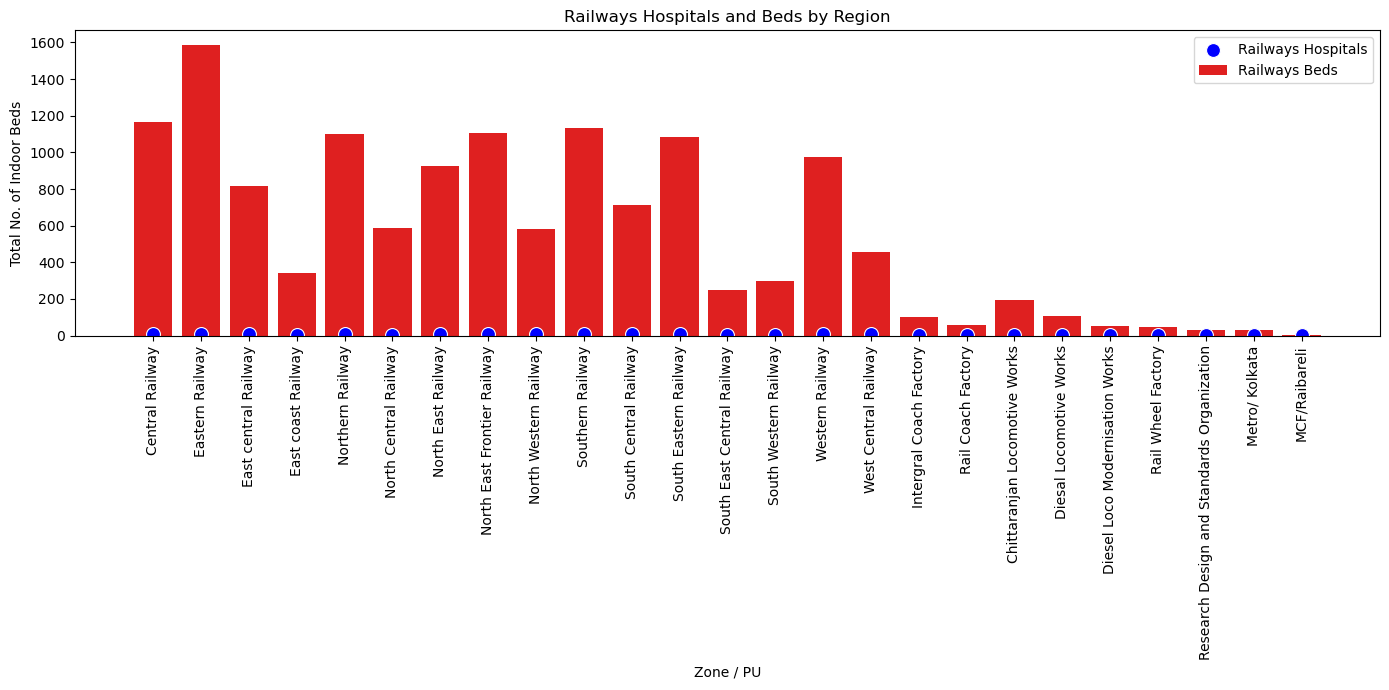

In [61]:
defence_df = pd.read_csv('Hospitals and Beds maintained by Ministry of Defence.csv')
railways_df = pd.read_csv('Hospitals and beds maintained by Railways.csv')

# Clean the Railways dataset
railways_df_cleaned = railways_df.copy()
railways_df_cleaned.columns = railways_df_cleaned.iloc[0]  # Set the first row as the header
railways_df_cleaned = railways_df_cleaned.drop(railways_df_cleaned.index[0])  # Drop the first row
railways_df_cleaned.reset_index(drop=True, inplace=True)  # Reset the index

# Rename columns for consistency
railways_df_cleaned.columns = ['S. No.', 'Zone / PU', 'Total No. of Hospitals', 'Total No. of Indoor Beds']

# Convert the numeric columns to the appropriate data types
railways_df_cleaned['Total No. of Hospitals'] = pd.to_numeric(railways_df_cleaned['Total No. of Hospitals'])
railways_df_cleaned['Total No. of Indoor Beds'] = pd.to_numeric(railways_df_cleaned['Total No. of Indoor Beds'])

# Exclude the last row
railways_df_cleaned_filtered = railways_df_cleaned.iloc[:-1]

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

# Plot the barplot and scatter plot
sns.barplot(ax=axes, x='Zone / PU', y='Total No. of Indoor Beds', data=railways_df_cleaned_filtered, color='red', label='Railways Beds')
sns.scatterplot(ax=axes, x='Zone / PU', y='Total No. of Hospitals', data=railways_df_cleaned_filtered, color='blue', label='Railways Hospitals', s=100)

# Customize the plot
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_xlabel('Zone / PU')
axes.set_title('Railways Hospitals and Beds by Region')
axes.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Analysis:-** The bar chart highlights a substantial imbalance in the distribution of hospitals and beds across Indian Railways. Regions such as Central, Eastern, and East Central Railways possess a significantly larger number of these facilities compared to others. This uneven distribution could potentially compromise healthcare accessibility for railway employees and their dependents, particularly in areas lacking hospitals, potentially leading to longer travel distances for emergency medical care and potential delays in critical treatment. 


# CONCLUSION OF ANALYSIS ON HEATHCARE:-

**Conclusion:-**
- In conclusion, this project has provided deep insights into the healthcare landscape of India, focusing on both demographic factors and sector-specific analyses within the defense and railway sectors. The demographic analysis highlighted significant correlations between population demographics, literacy rates, and healthcare accessibility. It underscored the need for targeted healthcare interventions to address regional disparities and improve overall healthcare outcomes across different states and union territories.

- Moving to the sector-specific analysis, evaluating Ministry of Defence and Indian Railways hospitals revealed critical insights into hospital counts, bed availability, and geographic distribution. The analysis showcased varying healthcare capabilities across different regions, emphasizing the importance of equitable distribution and strategic healthcare planning. These findings are instrumental for policymakers and healthcare administrators in optimizing resource allocation and enhancing healthcare infrastructure to better serve both civilian and defense personnel.

- This project not only deepened my understanding of healthcare analytics but also reinforced the significance of data-driven decision-making in improving public health outcomes.